In [81]:
from astropy.io import ascii, fits
import astropy
import pylab as plt
%matplotlib inline
from astropy import wcs
from astropy.table import Table,Column,join,hstack,vstack
from astropy.coordinates import SkyCoord
from astropy import units as u
from astropy.cosmology import WMAP9 as cosmo
import pymoc
import glob
from time import sleep
import os
from astropy.nddata.utils import Cutout2D
import herschelhelp.cutouts_server as ctts

import numpy as np
import xidplus
from xidplus import moc_routines
import pickle
import xidplus.catalogue as cat

import sys
from herschelhelp_internal.utils import inMoc,flux_to_mag
from xidplus.stan_fit import SPIRE

import aplpy
import seaborn as sns
#sns.set(color_codes=True)
import pandas as pd
#sns.set_style("white")
import xidplus.posterior_maps as postmaps
from herschelhelp_internal.masterlist import merge_catalogues, nb_merge_dist_plot, specz_merge
from herschelhelp import image_plotting
import pyvo as vo
import glob

import copy
from pymoc.io.fits import read_moc_fits

In [2]:
def read_fits(filename):
    hdulist = fits.open(filename)
    data = hdulist[1].data
    hdulist.close()
    return(data)

In [3]:
def find_posteror_source(source_num,source_id):
    #finds the pkl file corresponding to the source you give.
    # Source_num: the row number of the source you want the pkl file for
    # Source_id: the sources id
    
    if type(source_num)==int:
        source_num = [source_num]
        source_id = [source_id]
    

    source_list = []
    for n,num in enumerate(source_num):
        file_num = int(num/10)
        #print(file_num)
        #print('data/fir_v2/xidplus_run_{}/lofar_xidplus_fir_{}_rerun.pkl.pkl'.format(file_num,file_num))
        name = file_list[file_num].replace('fits','pkl.pkl')
        #print(name)
        priors,posterior = xidplus.load(name)
        #print(source_id[n])
        if source_id[n] not in priors[0].ID:
            print('source number :{}: not in opened file. Something is wrong'.format(num))
        source_list.append([priors,posterior])
        
    return(source_list)

In [4]:
lofar_orig = Table.read('data/data_release/final_cross_match_catalogue-v0.5.fits')
mips_prior = Table.read('data/data_release/xidplus_prior_cat_MIPS_rerun.fits')
pacs_prior = Table.read('data/data_release/xidplus_prior_cat_rerun_mips.fits')

#read in the HELP catalogue
masterlist = Table.read('../../../../../HELP/dmu_products/dmu32/dmu32_Bootes/data/Bootes_20190701_cigale.fits')

In [5]:
lofar_orig[0]

Source_Name,RA,DEC,E_RA,E_DEC,Total_flux,E_Total_flux,Peak_flux,E_Peak_flux,S_Code,Maj,Min,PA,E_Maj,E_Min,E_PA,DC_Maj,DC_Min,DC_PA,Isl_rms,FLAG_WORKFLOW,Prefilter,NoID,lr_fin,optRA,optDec,LGZ_Size,LGZ_Width,LGZ_PA,Assoc,Assoc_Qual,Art_prob,Blend_prob,Hostbroken_prob,Imagemissing_prob,Zoom_prob,Created,Position_from,Renamed_from,FLAG_OVERLAP_RADIO,flag_clean_radio,ALPHA_J2000,DELTA_J2000,FLAG_DEEP,flag_clean,ID_OPTICAL,ID_SPITZER,ID,FLAG_OVERLAP,EBV,FUV_flux_corr,FUV_fluxerr_corr,FUV_mag_corr,FUV_magerr_corr,NUV_flux_corr,NUV_fluxerr_corr,NUV_mag_corr,NUV_magerr_corr,u_flux_corr,u_fluxerr_corr,u_mag_corr,u_magerr_corr,Bw_flux_corr,Bw_fluxerr_corr,Bw_mag_corr,Bw_magerr_corr,R_flux_corr,R_fluxerr_corr,R_mag_corr,R_magerr_corr,I_flux_corr,I_fluxerr_corr,I_mag_corr,I_magerr_corr,z_flux_corr,z_fluxerr_corr,z_mag_corr,z_magerr_corr,z_Subaru_flux_corr,z_Subaru_fluxerr_corr,z_Subaru_mag_corr,z_Subaru_magerr_corr,y_flux_corr,y_fluxerr_corr,y_mag_corr,y_magerr_corr,J_flux_corr,J_fluxerr_corr,J_mag_corr,J_magerr_corr,H_flux_corr,H_fluxerr_corr,H_mag_corr,H_magerr_corr,K_flux_corr,K_fluxerr_corr,K_mag_corr,K_magerr_corr,Ks_flux_corr,Ks_fluxerr_corr,Ks_mag_corr,Ks_magerr_corr,ch1_flux_corr,ch1_fluxerr_corr,ch1_mag_corr,ch1_magerr_corr,ch2_flux_corr,ch2_fluxerr_corr,ch2_mag_corr,ch2_magerr_corr,ch3_flux_corr,ch3_fluxerr_corr,ch3_mag_corr,ch3_magerr_corr,ch4_flux_corr,ch4_fluxerr_corr,ch4_mag_corr,ch4_magerr_corr,Separation,help_id,RA_HELP,DEC_HELP,CLASS_STAR,F_MIPS_24,FErr_MIPS_24_u,FErr_MIPS_24_l,Bkg_MIPS_24,Sig_conf_MIPS_24,Rhat_MIPS_24,n_eff_MIPS_24,Pval_res_24,flag_mips_24,F_PACS_100,FErr_PACS_100_u,FErr_PACS_100_l,F_PACS_160,FErr_PACS_160_u,FErr_PACS_160_l,Bkg_PACS_100,Bkg_PACS_160,Sig_conf_PACS_100,Sig_conf_PACS_160,Rhat_PACS_100,Rhat_PACS_160,n_eff_PACS_100,n_eff_PACS_160,Pval_res_100,Pval_res_160,flag_PACS_100,flag_PACS_160,F_SPIRE_250,FErr_SPIRE_250_u,FErr_SPIRE_250_l,F_SPIRE_350,FErr_SPIRE_350_u,FErr_SPIRE_350_l,F_SPIRE_500,FErr_SPIRE_500_u,FErr_SPIRE_500_l,Bkg_SPIRE_250,Bkg_SPIRE_350,Bkg_SPIRE_500,Sig_conf_SPIRE_250,Sig_conf_SPIRE_350,Sig_conf_SPIRE_500,Rhat_SPIRE_250,Rhat_SPIRE_350,Rhat_SPIRE_500,n_eff_SPIRE_250,n_eff_SPIRE_500,n_eff_SPIRE_350,Pval_res_250,Pval_res_350,Pval_res_500,flag_spire_250,flag_spire_350,flag_spire_500,Z_BEST,Z_BEST_SOURCE,Z_SPEC,Z_SOURCE,Z_QUAL,RA_ZSPEC,DEC_ZSPEC,REL,OBJID,z1_median,z1_min,z1_max,z1_area,z2_median,z2_min,z2_max,z2_area,nfilt_eazy,nfilt_atlas,nfilt_ananna,chi_r_best,chi_r_stellar,stellar_type,AGN,optAGN,IRAGN,AGN_ZSPEC,XrayAGN,XrayFlux_0.5-2,XrayHardness,hp_idx_11,hp_depth_cluster,tot_corr_z_Subaru,tot_corr_err_z_Subaru,tot_corr_z,tot_corr_err_z,zmodel,chi_best,Mass_median,Mass_l68,Mass_u68,SFR_median,SFR_l68,SFR_u68,Nfilts,u_rest,Bw_rest,R_rest,I_rest,z_rest,z_Subaru_rest,y_rest,J_rest,H_rest,K_rest,Ks_rest,ch1_rest,ch2_rest,ch3_rest,ch4_rest
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,deg,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
bytes22,float64,float64,float64,float64,float64,float64,float64,float64,bytes1,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,bytes22,bytes17,bytes22,int64,int64,float64,float64,float64,int64,int64,int64,float64,int64,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float

In [6]:
fname = 'data/data_release/radio_image.fits'
hdulist = fits.open(fname)
radim_header = hdulist[0].header
radim_wcs = wcs.WCS(radim_header).celestial
radim_data = hdulist[0].data[0][0]
hdulist.close()

## Check that my results agree with HELP

In [27]:
file_list = glob.glob('data/fir/MIPS/*/lofar_xidplus*.pkl')

priors,posterior = xidplus.load(file_list[0])
MIPS_cat=cat.create_MIPS_cat(posterior,priors[0],0)
lofar_mips_table_all = Table.read(MIPS_cat,memmap=False)

for i,filename in enumerate(file_list[1:]):
    #print(filename)
    if i%50==0:
        print(i)
    if ('rerun' in filename) or ('.pkl.pkl' in filename):
        print('skipping')
        continue
    
    priors,posterior = xidplus.load(filename)
    MIPS_cat=cat.create_MIPS_cat(posterior,priors[0],0)
    MIPS_cat = Table.read(MIPS_cat,memmap=False)
    lofar_mips_table_all = vstack([lofar_mips_table_all,MIPS_cat])
    

data_rerun_table = lofar_mips_table_all

0
skipping
skipping
skipping
skipping
skipping
skipping
skipping
skipping
skipping
skipping
skipping
skipping
skipping
skipping
skipping
skipping
skipping
skipping
skipping
skipping
50
skipping
skipping
skipping
skipping
skipping
skipping
skipping
skipping
skipping
skipping
skipping
skipping
skipping
skipping
skipping
skipping
skipping
100
skipping
skipping
skipping
skipping
skipping


In [28]:
mask = np.array(['rerun' in name for name in file_list])
test = np.array(file_list)[~mask]
print(len(test))
test

81


array(['data/fir/MIPS/xidplus_run_20/lofar_xidplus_fir_20.pkl',
       'data/fir/MIPS/xidplus_run_70/lofar_xidplus_fir_70.pkl',
       'data/fir/MIPS/xidplus_run_19/lofar_xidplus_fir_19.pkl',
       'data/fir/MIPS/xidplus_run_73/lofar_xidplus_fir_73.pkl',
       'data/fir/MIPS/xidplus_run_66/lofar_xidplus_fir_66.pkl',
       'data/fir/MIPS/xidplus_run_16/lofar_xidplus_fir_16.pkl',
       'data/fir/MIPS/xidplus_run_42/lofar_xidplus_fir_42.pkl',
       'data/fir/MIPS/xidplus_run_44/lofar_xidplus_fir_44.pkl',
       'data/fir/MIPS/xidplus_run_37/lofar_xidplus_fir_37.pkl',
       'data/fir/MIPS/xidplus_run_25/lofar_xidplus_fir_25.pkl',
       'data/fir/MIPS/xidplus_run_68/lofar_xidplus_fir_68.pkl',
       'data/fir/MIPS/xidplus_run_1/lofar_xidplus_fir_1.pkl.pkl',
       'data/fir/MIPS/xidplus_run_1/lofar_xidplus_fir_1.pkl',
       'data/fir/MIPS/xidplus_run_40/lofar_xidplus_fir_40.pkl',
       'data/fir/MIPS/xidplus_run_8/lofar_xidplus_fir_8.pkl',
       'data/fir/MIPS/xidplus_run_15/lofar

In [29]:
lofar_mips_table_all[0]

help_id,RA,Dec,F_MIPS_24,FErr_MIPS_24_u,FErr_MIPS_24_l,Bkg_MIPS_24,Sig_conf_MIPS_24,Rhat_MIPS_24,n_eff_MIPS_24,Pval_res_24
,degrees,degrees,muJy,muJy,muJy,MJy / sr,MJy / sr,,,
str27,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32
HELP_J142739.554+333208.205,216.91480995616197,33.535612527634,28.61868,40.91429,17.024887,0.000434469,4.315356e-06,0.9995879,1772.3083,0.0


In [30]:
joined_mips = join(lofar_mips_table_all,masterlist,join_type='inner',keys='help_id')

In [31]:
print('length of MIPS joined table is: {}'.format(len(joined_mips['help_id'])))
print('number of unique sources in the MIPS rerun is: {}'.format(len(np.unique(joined_mips['help_id']))))

length of MIPS joined table is: 110938
number of unique sources in the MIPS rerun is: 110184


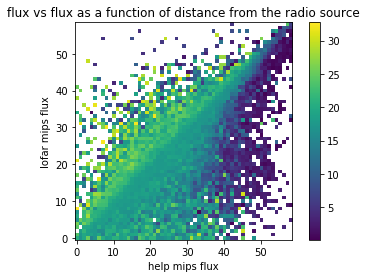

In [32]:
ra1 = lofar_orig['RA'].data
dec1 = lofar_orig['DEC'].data
c_lofar = SkyCoord(ra=ra1*u.degree, dec=dec1*u.degree)
ra1 = joined_mips['ra'].data
dec1 = joined_mips['dec'].data
c_help = SkyCoord(ra=ra1*u.degree, dec=dec1*u.degree)
idx, d2d, _ = c_help.match_to_catalog_3d(c_lofar)

col = d2d.value*3600

x = np.log10(joined_mips['f_mips_24'])
y = np.log10(joined_mips['F_MIPS_24'])

bins = np.linspace(0,3,60)
data_num,xbin,ybin = np.histogram2d(y,x,bins=bins)
data_y_avg,xbin,ybin = np.histogram2d(y,x,bins=bins,weights=col)
plt.imshow(data_y_avg/data_num)
#plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
#plt.gca().invert_xaxis()
#plt.gca().invert_yaxis()
plt.colorbar()
plt.xlabel('help mips flux')
plt.ylabel('lofar mips flux')
plt.title('flux vs flux as a function of distance from the radio source')
plt.show()

In [33]:
from astropy.io import registry
from astropy.table.info import serialize_method_as

with serialize_method_as(lofar_mips_table_all, None):
            registry.write(lofar_mips_table_all, 'data/fir/MIPS/all_sources.fits',format='fits',overwrite=True)

<class 'astropy.table.table.Table'>
fits


## Processing MIPS output

In [34]:
file_list = glob.glob('data/fir/MIPS/*/lofar_xidplus*.fits')
num_not = np.arange(428,860,1)

lofar_mips_table = Table.read(file_list[0])
for i,filename in enumerate(file_list[1:]):
    #print(filename)
    if i%50==0:
        print(i)
    if 'rerun' in filename:
        continue

    
    #print(filename)
    new_table = Table.read(filename,memmap=False)
    if len(new_table)!=50:
        print(filename)
        print('length of table is: {}'.format(len(new_table)))
    lofar_mips_table = vstack([lofar_mips_table,new_table])
data_rerun_table = lofar_mips_table

0
data/fir/MIPS/xidplus_run_1/lofar_xidplus_fir_1.fits
length of table is: 100
data/fir/MIPS/xidplus_run_76/lofar_xidplus_fir_76.fits
length of table is: 48
50
data/fir/MIPS/xidplus_run_2/lofar_xidplus_fir_2.fits
length of table is: 100
data/fir/MIPS/xidplus_run_0/lofar_xidplus_fir_0.fits
length of table is: 100
100


In [35]:
file_list.sort()
for file in file_list:
    if 'rerun' in file:
        continue
    print(file)

data/fir/MIPS/xidplus_run_0/lofar_xidplus_fir_0.fits
data/fir/MIPS/xidplus_run_1/lofar_xidplus_fir_1.fits
data/fir/MIPS/xidplus_run_10/lofar_xidplus_fir_10.fits
data/fir/MIPS/xidplus_run_11/lofar_xidplus_fir_11.fits
data/fir/MIPS/xidplus_run_12/lofar_xidplus_fir_12.fits
data/fir/MIPS/xidplus_run_13/lofar_xidplus_fir_13.fits
data/fir/MIPS/xidplus_run_14/lofar_xidplus_fir_14.fits
data/fir/MIPS/xidplus_run_15/lofar_xidplus_fir_15.fits
data/fir/MIPS/xidplus_run_16/lofar_xidplus_fir_16.fits
data/fir/MIPS/xidplus_run_17/lofar_xidplus_fir_17.fits
data/fir/MIPS/xidplus_run_18/lofar_xidplus_fir_18.fits
data/fir/MIPS/xidplus_run_19/lofar_xidplus_fir_19.fits
data/fir/MIPS/xidplus_run_2/lofar_xidplus_fir_2.fits
data/fir/MIPS/xidplus_run_20/lofar_xidplus_fir_20.fits
data/fir/MIPS/xidplus_run_21/lofar_xidplus_fir_21.fits
data/fir/MIPS/xidplus_run_22/lofar_xidplus_fir_22.fits
data/fir/MIPS/xidplus_run_23/lofar_xidplus_fir_23.fits
data/fir/MIPS/xidplus_run_24/lofar_xidplus_fir_24.fits
data/fir/MIPS/xi

In [36]:
print(len(np.unique(lofar_mips_table['help_id'])))
print(len(lofar_mips_table))
lofar_mips_table[0]

3848
3998


help_id,RA,Dec,F_MIPS_24,FErr_MIPS_24_u,FErr_MIPS_24_l,Bkg_MIPS_24,Sig_conf_MIPS_24,Rhat_MIPS_24,n_eff_MIPS_24,Pval_res_24
,degrees,degrees,muJy,muJy,muJy,MJy / sr,MJy / sr,,,
bytes27,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32
ILTJ142741.32+354752.2,216.9221068,35.7978237,1830.1195,1845.8298,1815.3425,0.000434469,4.315356e-06,1.0000547,3304.8503,0.002


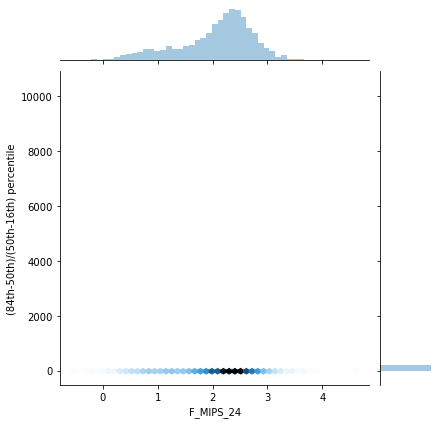

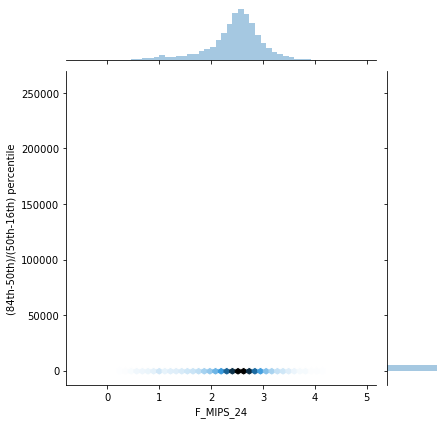

In [37]:
skew=(lofar_mips_table['FErr_MIPS_24_u']-lofar_mips_table['F_MIPS_24'])/(lofar_mips_table['F_MIPS_24']-lofar_mips_table['FErr_MIPS_24_l'])
skew.name='(84th-50th)/(50th-16th) percentile'
g=sns.jointplot(x=np.log10(lofar_mips_table['F_MIPS_24']),y=skew, kind='hex')

skew=(lofar_orig['FErr_MIPS_24_u']-lofar_orig['F_MIPS_24'])/(lofar_orig['F_MIPS_24']-lofar_orig['FErr_MIPS_24_l'])
skew.name='(84th-50th)/(50th-16th) percentile'
g=sns.jointplot(x=np.log10(lofar_orig['F_MIPS_24']),y=skew, kind='hex')

In [38]:
lofar_mips_table.add_column(Column(np.zeros(len(data_rerun_table), dtype=bool),name='flag_mips_24'))



In [117]:
ind_SERVS_250=(lofar_mips_table['Pval_res_24']>0.5) | (lofar_mips_table['F_MIPS_24'] <20)
print(ind_SERVS_250.sum(),len(lofar_mips_table))

lofar_mips_table['flag_mips_24'][ind_SERVS_250]=True

681 3182


In [40]:
rerun_col = Column(np.ones(len(lofar_mips_table)),name='XID+_rerun_mips',dtype='bool')
lofar_mips_table.add_column(rerun_col)

In [41]:
lofar_mips_table[0]

help_id,RA,Dec,F_MIPS_24,FErr_MIPS_24_u,FErr_MIPS_24_l,Bkg_MIPS_24,Sig_conf_MIPS_24,Rhat_MIPS_24,n_eff_MIPS_24,Pval_res_24,flag_mips_24,XID+_rerun_mips
,degrees,degrees,muJy,muJy,muJy,MJy / sr,MJy / sr,,,,,
bytes27,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,bool,bool
ILTJ142741.32+354752.2,216.9221068,35.7978237,1830.1195,1845.8298,1815.3425,0.000434469,4.315356e-06,1.0000547,3304.8503,0.002,False,True


3182


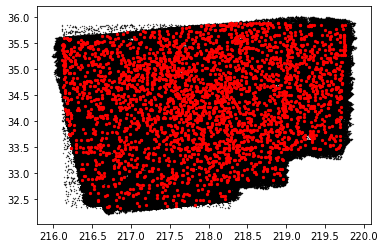

In [115]:
#remove pacs sources from the table which are not covered by PACS as these sources are still assigned a PACS flux 
#by XID+ which is wrong

ras = lofar_mips_table['RA']
decs = lofar_mips_table['Dec']

pacs_moc = pymoc.moc.MOC()
read_moc_fits(pacs_moc,'/lustre/scratch/astro/im281/HELP/dmu_products/dmu26/dmu26_XID+MIPS_Bootes/data/testMoc.fits')

mask = inMoc(ras,decs,pacs_moc)
print(np.sum(mask))

x = mips_prior['ra']
y = mips_prior['dec']
plt.scatter(x,y,c='black',s=0.1)

ras = lofar_mips_table['RA'][mask]#[~ind_SERVS_160]
decs = lofar_mips_table['Dec'][mask]#[~ind_SERVS_160]
plt.scatter(ras,decs,c='red',s=5)


plt.show()

In [116]:
#remove pacs sources from the table which are not covered by PACS as these sources are still assigned a PACS flux 
#by XID+ which is wrong

ras = lofar_mips_table['RA']
decs = lofar_mips_table['Dec']

pacs_moc = pymoc.moc.MOC()
read_moc_fits(pacs_moc,'/lustre/scratch/astro/im281/HELP/dmu_products/dmu26/dmu26_XID+MIPS_Bootes/data/testMoc.fits')

mask = inMoc(ras,decs,pacs_moc)
lofar_mips_table = lofar_mips_table[mask]

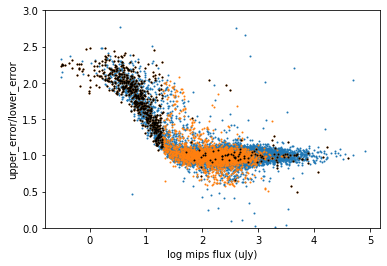

In [118]:
x = np.log10(lofar_orig['F_MIPS_24'])
y = (lofar_orig['FErr_MIPS_24_u']-lofar_orig['F_MIPS_24'])/(lofar_orig['F_MIPS_24']-lofar_orig['FErr_MIPS_24_l'])
plt.scatter(x,y,s=1)

x = np.log10(lofar_mips_table['F_MIPS_24'])
y = (lofar_mips_table['FErr_MIPS_24_u']-lofar_mips_table['F_MIPS_24'])/(lofar_mips_table['F_MIPS_24']-lofar_mips_table['FErr_MIPS_24_l'])
plt.scatter(x,y,s=1)

plt.scatter(x[ind_SERVS_250],y[ind_SERVS_250],s=1,c='black')
plt.xlabel('log mips flux (uJy)')
plt.ylabel('upper_error/lower_error')
plt.ylim(0.0,3)
plt.show()

In [123]:
#remove duplicate sources from the themips catalogue as some sources were run twice

unique_ids,counts = np.unique(lofar_mips_table['help_id'],return_counts=True)
print(len(lofar_mips_table),len(unique_ids))

mask = counts>1
dup_ids = unique_ids[mask]

for name in dup_ids:
    mask = lofar_mips_table['help_id']==name
    errs = lofar_mips_table['FErr_MIPS_24_u'][mask] - lofar_mips_table['FErr_MIPS_24_l'][mask]
    err_num = np.argmin(errs)
    
    keep_row = lofar_mips_table[mask][err_num]
    lofar_mips_table = lofar_mips_table[~mask]
    lofar_mips_table = vstack([lofar_mips_table,keep_row])
    
unique_ids,counts = np.unique(lofar_mips_table['help_id'],return_counts=True)
print(len(lofar_mips_table),len(unique_ids))

3182 3143


### Plot mips sources

In [29]:
#read in mips image and create wcs
imfolder='../../../../../HELP/dmu_products/dmu17/dmu17_HELP_Legacy_maps//Bootes/data/'

pswfits=imfolder+'wp4_bootes_mips24_map_v1.0.fits.gz'#SPIRE 250 map

MIPS_Map = fits.open(pswfits)

#-----250-------------
hdulist = fits.open(pswfits)
im24phdu=hdulist[0].header
im24hdu=hdulist[1].header

im24=hdulist[1].data*1.0E3 #convert to mJy
nim24=hdulist[2].data*1.0E3 #convert to mJy
w_24 = wcs.WCS(hdulist[1].header)
hdulist.close()

In [31]:
plot_params = {'marker':['o','+','s','v','X','d'],
              'col':['green','cyan','orange'],
              'size':100,
              'box_length':1/120,
              'use_redshift':[False,False,False,False]}

contours are at [-2.20998121e-04 -2.82375848e-05  1.64522951e-04  3.57283487e-04
  5.50044023e-04  7.42804559e-04  9.35565095e-04]
plotting 1 sources
plotting 1 sources
plotting 1 sources


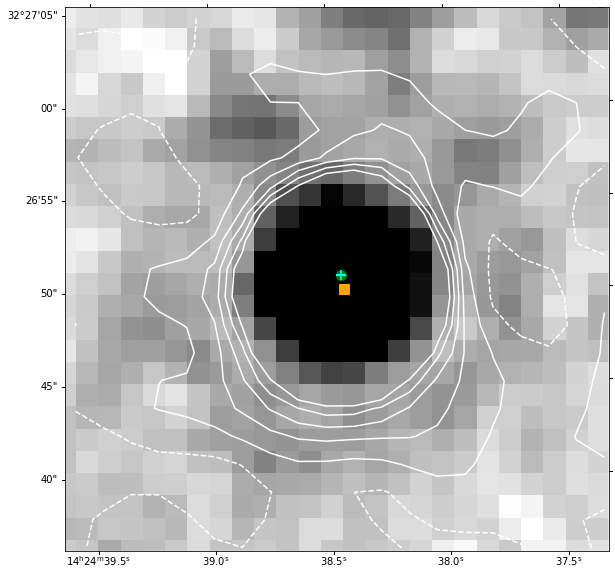

In [32]:
mask = (lofar_mips_table['RA']<216.3) & (lofar_mips_table['Dec']<32.5)
ra   = lofar_mips_table['RA'][mask][0]
dec = lofar_mips_table['Dec'][mask][0]


image_plotting.plot_figure(im24,[mips_prior,lofar_mips_table,lofar_orig],w_24,ra,dec,plot_params,contour_data=[radim_data,radim_wcs])

## Check against HELP results

In [43]:
file_list = glob.glob('data/fir/PACS/*/lofar_xidplus*.pkl')

priors,posterior = xidplus.load(file_list[0])
PACS_cat=cat.create_PACS_cat(posterior,priors[0],priors[1])
lofar_pacs_table_all = Table.read(PACS_cat,memmap=False)

for i,filename in enumerate(file_list):
    #print(filename)
    if i%50==0:
        print(i)
    
    priors,posterior = xidplus.load(filename)
    PACS_cat=cat.create_PACS_cat(posterior,priors[0],priors[1])
    PACS_cat = Table.read(PACS_cat,memmap=False)
    lofar_pacs_table_all = vstack([lofar_pacs_table_all,PACS_cat])

0
50
100
150
200


NameError: name 'lofar_pacs_table' is not defined

In [44]:
joined_pacs = join(lofar_pacs_table_all,masterlist,join_type='inner',keys='help_id')

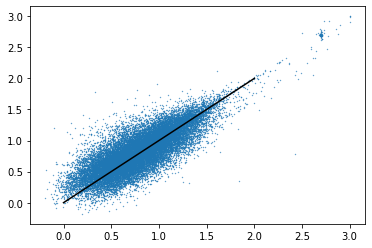

In [45]:
x = np.log10(joined_pacs['f_pacs_green'])-3
xerr = np.log10(joined_pacs['ferr_pacs_green'])-3
y = np.log10(joined_pacs['F_PACS_100'])
yerr_u = np.log10(joined_pacs['FErr_PACS_100_u'])
yerr_l = np.log10(joined_pacs['FErr_PACS_100_l'])

#plt.errorbar(x,y,xerr=xerr,yerr=[yerr_u,yerr_l])
plt.scatter(x,y,s=0.1)
plt.plot([0,2],[0,2],c='black')

plt.show()

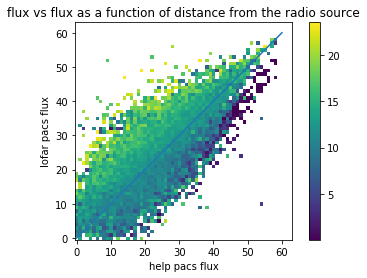

In [62]:
ra1 = lofar_pacs_table['RA'].data
dec1 = lofar_pacs_table['Dec'].data
c_lofar = SkyCoord(ra=ra1*u.degree, dec=dec1*u.degree)
ra1 = joined_pacs['ra'].data
dec1 = joined_pacs['dec'].data
c_help = SkyCoord(ra=ra1*u.degree, dec=dec1*u.degree)
idx, d2d, _ = c_help.match_to_catalog_3d(c_lofar)

col = d2d.value*3600

x = np.log10(joined_pacs['f_pacs_green'])-3
y = np.log10(joined_pacs['F_PACS_100'])

bins = np.linspace(0,2,60)
data_num,xbin,ybin = np.histogram2d(y,x,bins=bins)
data_y_avg,xbin,ybin = np.histogram2d(y,x,bins=bins,weights=col)
plt.imshow(data_y_avg/data_num)
#plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
#plt.gca().invert_xaxis()
#plt.gca().invert_yaxis()
plt.plot([0,60],[0,60])
plt.colorbar()
plt.xlabel('help pacs flux')
plt.ylabel('lofar pacs flux')
plt.title('flux vs flux as a function of distance from the radio source')
plt.show()

In [63]:
from astropy.io import registry
from astropy.table.info import serialize_method_as

with serialize_method_as(lofar_pacs_table_all, None):
            registry.write(lofar_pacs_table_all, 'data/fir/PACS/all_sources.fits',format='fits')

<class 'astropy.table.table.Table'>
fits


## Processing PACS output

In [85]:
file_list = glob.glob('data/fir/PACS/*/lofar_xidplus_fir*.fits')
#num_not = np.arange(428,860,1)

lofar_pacs_table = Table.read(file_list[0])
for i,filename in enumerate(file_list[1:]):
    #print(filename)
    if i%50==0:
        print(i)
    if 'rerun' in filename:
        continue
    
    #print(filename)
    new_table = Table.read(filename,memmap=False)
    if len(new_table)!=20:
        print(filename)
        print('length of table is: {}'.format(len(new_table)))
    lofar_pacs_table = vstack([lofar_pacs_table,new_table])
data_rerun_table = lofar_pacs_table

0
50
data/fir/PACS/xidplus_run_236/lofar_xidplus_fir_236.fits
length of table is: 3
100
150
200


In [86]:
print(len(lofar_pacs_table))
lofar_pacs_table

4723


help_id,RA,Dec,F_PACS_100,FErr_PACS_100_u,FErr_PACS_100_l,F_PACS_160,FErr_PACS_160_u,FErr_PACS_160_l,Bkg_PACS_100,Bkg_PACS_160,Sig_conf_PACS_100,Sig_conf_PACS_160,Rhat_PACS_100,Rhat_PACS_160,n_eff_PACS_100,n_eff_PACS_160,Pval_res_100,Pval_res_160
,degrees,degrees,mJy,mJy,mJy,mJy,mJy,mJy,mJy/Beam,mJy/Beam,mJy/Beam,mJy/Beam,,,,,,
bytes27,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32
ILTJ142922.65+330757.5,217.344398,33.132768,7.308027,13.755906,2.304208,6.2772007,14.050254,1.7774026,0.00039040705,0.00043048745,0.0008021994,0.0008212297,1.0027524,1.001463,815.3436,955.4159,1.0,0.993
ILTJ142922.70+325939.1,217.3448868,32.9943503,22.153893,30.063814,14.591344,4.951843,10.903648,1.3819636,0.00039040705,0.00043048745,0.0008021994,0.0008212297,1.0057727,1.0002496,750.3981,1531.8165,1.0,0.956
ILTJ142923.41+352849.8,217.348513,35.48093,1.5066073,3.7123532,0.42511627,54.37953,65.28633,44.093918,0.00039040705,0.00043048745,0.0008021994,0.0008212297,1.0011094,0.999855,1202.566,984.74133,1.0,0.986
ILTJ142923.68+350600.7,217.348423,35.100373,13.182372,24.438974,4.619703,3.5131106,8.776252,0.9005088,0.00039040705,0.00043048745,0.0008021994,0.0008212297,1.0134534,1.002085,370.79803,1024.4305,1.0,0.826
ILTJ142923.72+342026.2,217.348116,34.33978,7.48213,14.410007,2.409991,17.315096,27.286713,7.839969,0.00039040705,0.00043048745,0.0008021994,0.0008212297,1.0036443,1.0005945,885.55145,847.38666,1.0,0.997
ILTJ142923.76+343150.4,217.349017,34.530739,5.0697083,10.82794,1.5076231,4.2998257,9.988912,1.0745865,0.00039040705,0.00043048745,0.0008021994,0.0008212297,1.0016228,1.0015926,968.0998,1059.9752,1.0,0.931
ILTJ142923.85+333013.3,217.3491947,33.5037644,3.6120892,8.277773,0.93251914,25.547125,50.046192,7.805695,0.00039040705,0.00043048745,0.0008021994,0.0008212297,1.0003406,1.003002,1202.9653,288.00797,1.0,0.949
ILTJ142923.95+350732.5,217.3496504,35.1257094,14.693087,23.540092,7.2212744,30.493729,41.291023,17.787863,0.00039040705,0.00043048745,0.0008021994,0.0008212297,1.0156522,1.0222483,294.21088,186.10768,1.0,0.892


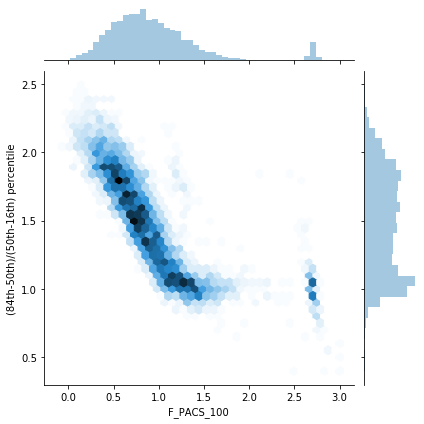

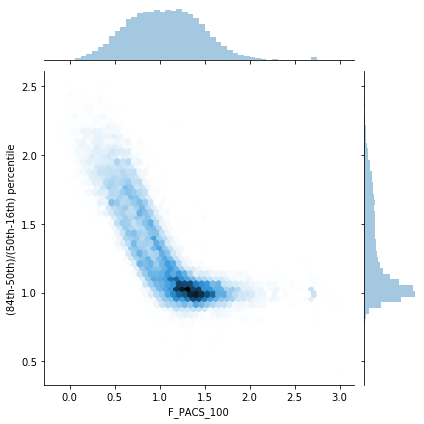

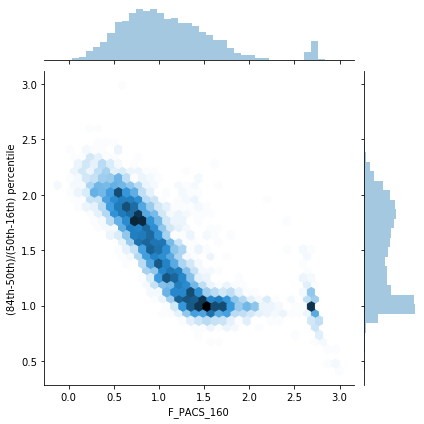

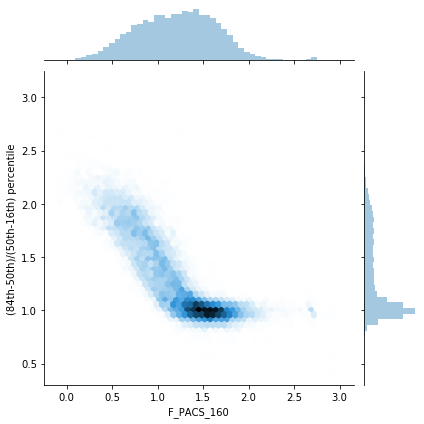

In [87]:
skew=(lofar_pacs_table['FErr_PACS_100_u']-lofar_pacs_table['F_PACS_100'])/(lofar_pacs_table['F_PACS_100']-lofar_pacs_table['FErr_PACS_100_l'])
skew.name='(84th-50th)/(50th-16th) percentile'
g=sns.jointplot(x=np.log10(lofar_pacs_table['F_PACS_100']),y=skew, kind='hex')

skew=(lofar_orig['FErr_PACS_100_u']-lofar_orig['F_PACS_100'])/(lofar_orig['F_PACS_100']-lofar_orig['FErr_PACS_100_l'])
skew.name='(84th-50th)/(50th-16th) percentile'
g=sns.jointplot(x=np.log10(lofar_orig['F_PACS_100']),y=skew, kind='hex')

skew=(lofar_pacs_table['FErr_PACS_160_u']-lofar_pacs_table['F_PACS_160'])/(lofar_pacs_table['F_PACS_160']-lofar_pacs_table['FErr_PACS_160_l'])
skew.name='(84th-50th)/(50th-16th) percentile'
g=sns.jointplot(x=np.log10(lofar_pacs_table['F_PACS_160']),y=skew, kind='hex')

skew=(lofar_orig['FErr_PACS_160_u']-lofar_orig['F_PACS_160'])/(lofar_orig['F_PACS_160']-lofar_orig['FErr_PACS_160_l'])
skew.name='(84th-50th)/(50th-16th) percentile'
g=sns.jointplot(x=np.log10(lofar_orig['F_PACS_160']),y=skew, kind='hex')

In [88]:
lofar_pacs_table.add_column(Column(np.zeros(len(lofar_pacs_table), dtype=bool),name='flag_pacs_100'))
lofar_pacs_table.add_column(Column(np.zeros(len(lofar_pacs_table), dtype=bool),name='flag_pacs_160'))

In [89]:
ind_SERVS_100=(lofar_pacs_table['Pval_res_100']>0.5) | (lofar_pacs_table['F_PACS_100'] < 12.5)
ind_SERVS_160=(lofar_pacs_table['Pval_res_160']>0.5) | (lofar_pacs_table['F_PACS_160'] < 17.5)
print(ind_SERVS_100.sum(),ind_SERVS_160.sum(),len(lofar_pacs_table))

lofar_pacs_table['flag_pacs_100'][ind_SERVS_100]=True
lofar_pacs_table['flag_pacs_160'][ind_SERVS_160]=True

4536 4441 4723


In [90]:
rerun_col = Column(np.ones(len(lofar_pacs_table)),name='XID+_rerun_pacs',dtype='bool')
lofar_pacs_table.add_column(rerun_col)

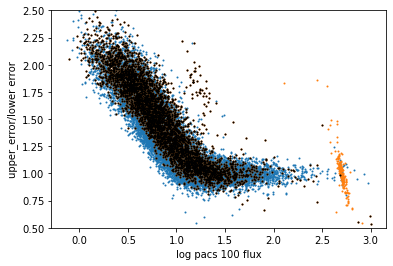

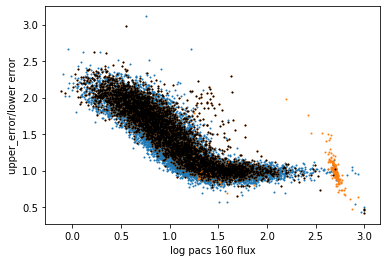

In [91]:
x = np.log10(lofar_orig['F_PACS_100'])
y = (lofar_orig['FErr_PACS_100_u']-lofar_orig['F_PACS_100'])/(lofar_orig['F_PACS_100']-lofar_orig['FErr_PACS_100_l'])
plt.scatter(x,y,s=1)

x = np.log10(lofar_pacs_table['F_PACS_100'])
y = (lofar_pacs_table['FErr_PACS_100_u']-lofar_pacs_table['F_PACS_100'])/(lofar_pacs_table['F_PACS_100']-lofar_pacs_table['FErr_PACS_100_l'])
plt.scatter(x,y,s=1)

plt.scatter(x[ind_SERVS_100],y[ind_SERVS_100],s=1,c='black')
plt.xlabel('log pacs 100 flux')
plt.ylabel('upper_error/lower error')
plt.ylim(0.5,2.5)
plt.show()

x = np.log10(lofar_orig['F_PACS_160'])
y = (lofar_orig['FErr_PACS_160_u']-lofar_orig['F_PACS_160'])/(lofar_orig['F_PACS_160']-lofar_orig['FErr_PACS_160_l'])
plt.scatter(x,y,s=1)

x = np.log10(lofar_pacs_table['F_PACS_160'])
y = (lofar_pacs_table['FErr_PACS_160_u']-lofar_pacs_table['F_PACS_160'])/(lofar_pacs_table['F_PACS_160']-lofar_pacs_table['FErr_PACS_160_l'])
plt.scatter(x,y,s=1)

plt.scatter(x[ind_SERVS_160],y[ind_SERVS_160],s=1,c='black')
plt.xlabel('log pacs 160 flux')
plt.ylabel('upper_error/lower error')
plt.show()

3950


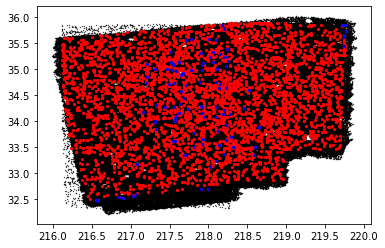

In [92]:
#remove pacs sources from the table which are not covered by PACS as these sources are still assigned a PACS flux 
#by XID+ which is wrong

ras = lofar_pacs_table['RA']
decs = lofar_pacs_table['Dec']

pacs_moc = pymoc.moc.MOC()
read_moc_fits(pacs_moc,'/lustre/scratch/astro/im281/HELP/dmu_products/dmu26/dmu26_XID+PACS_Bootes/data/testMoc.fits')

mask = inMoc(ras,decs,pacs_moc)
print(np.sum(mask))

x = pacs_prior['ra']
y = pacs_prior['dec']
plt.scatter(x,y,c='black',s=0.1)

ras = lofar_pacs_table['RA'][mask]#[~ind_SERVS_160]
decs = lofar_pacs_table['Dec'][mask]#[~ind_SERVS_160]
plt.scatter(ras,decs,c='red',s=5)

ras = lofar_pacs_table['RA'][~ind_SERVS_160 & mask]
decs = lofar_pacs_table['Dec'][~ind_SERVS_160 & mask]
plt.scatter(ras,decs,c='blue',s=5)
plt.show()
#ras = lofar_pacs_table['RA'][~ind_SERVS_160]
#decs = lofar_pacs_table['Dec'][~ind_SERVS_160]
#plt.scatter(ras,decs,c='blue',s=50)

In [93]:
#remove pacs sources from the table which are not covered by PACS as these sources are still assigned a PACS flux 
#by XID+ which is wrong

ras = lofar_pacs_table['RA']
decs = lofar_pacs_table['Dec']

pacs_moc = pymoc.moc.MOC()
read_moc_fits(pacs_moc,'/lustre/scratch/astro/im281/HELP/dmu_products/dmu26/dmu26_XID+PACS_Bootes/data/testMoc.fits')

mask = inMoc(ras,decs,pacs_moc)
lofar_pacs_table = lofar_pacs_table[mask]

In [71]:
imfolder='../../../../../HELP/dmu_products/dmu18/dmu18_HELP-PACS-maps/data/'

im100fits=imfolder + 'Bootes_PACS100_v0.9.fits'#PACS 100 map
im160fits=imfolder + 'Bootes_PACS160_v0.9.fits'#PACS 160 map

#-----100-------------
hdulist = fits.open(im100fits)
im100phdu=hdulist[0].header
im100hdu=hdulist[1].header
im100=hdulist[1].data
w_100 = wcs.WCS(hdulist[1].header)
pixsize100=3600.0*np.abs(hdulist[1].header['CDELT1']) #pixel size (in arcseconds)

nim100=hdulist[2].data
hdulist.close()

#-----160-------------
hdulist = fits.open(im160fits)
im160phdu=hdulist[0].header
im160hdu=hdulist[1].header

im160=hdulist[1].data #convert to mJy
w_160 = wcs.WCS(hdulist[1].header)
pixsize160=3600.0*np.abs(hdulist[1].header['CDELT1']) #pixel size (in arcseconds)

nim160=hdulist[2].data
hdulist.close()

In [188]:
plot_params = {'marker':['o','+','+','v','X','d'],
              'col':['green','cyan','orange'],
              'size':100,
              'box_length':1/60,
              'use_redshift':[False,False,False]}

## Processing SPIRE output

In [94]:
file_list = glob.glob('data/fir/SPIRE/*/lofar_xidplus_fir*.fits')

lofar_spire_table = Table.read(file_list[0])
for i,filename in enumerate(file_list[1:]):
    #print(filename)
    if i%50==0:
        print(i)
    if 'rerun' in filename:
        continue
    
    #print(filename)
    new_table = Table.read(filename,memmap=False)
    if len(new_table)!=20:
        print(filename)
        print('length of table is: {}'.format(len(new_table)))
    lofar_spire_table = vstack([lofar_spire_table,new_table])
data_rerun_table = lofar_spire_table

0
50
100
150
data/fir/SPIRE/xidplus_run_236/lofar_xidplus_fir_236.fits
length of table is: 3
200
250
300
350
400
450


In [95]:
lofar_spire_table

HELP_ID,RA,Dec,F_SPIRE_250,FErr_SPIRE_250_u,FErr_SPIRE_250_l,F_SPIRE_350,FErr_SPIRE_350_u,FErr_SPIRE_350_l,F_SPIRE_500,FErr_SPIRE_500_u,FErr_SPIRE_500_l,Bkg_SPIRE_250,Bkg_SPIRE_350,Bkg_SPIRE_500,Sig_conf_SPIRE_250,Sig_conf_SPIRE_350,Sig_conf_SPIRE_500,Rhat_SPIRE_250,Rhat_SPIRE_350,Rhat_SPIRE_500,n_eff_SPIRE_250,n_eff_SPIRE_500,n_eff_SPIRE_350,Pval_res_250,Pval_res_350,Pval_res_500
,degrees,degrees,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy/Beam,mJy/Beam,mJy/Beam,mJy/Beam,mJy/Beam,mJy/Beam,,,,,,,,,
bytes27,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32
ILTJ142922.65+330757.5,217.344398,33.132768,2.2884002,5.1263633,0.5876314,3.1125546,6.974513,0.86671054,2.2315803,5.200044,0.55100584,-4.731717,-7.5404167,-15.062516,2.8346136,3.74478,5.9275064,0.99907297,0.99970216,0.9993674,2661.8884,3521.5505,3125.2954,0.0,0.0,0.074
ILTJ142922.70+325939.1,217.3448868,32.9943503,2.498102,5.419995,0.74209625,3.448098,7.350877,1.1265541,2.557772,5.9607067,0.61688113,-4.731717,-7.5404167,-15.062516,2.8346136,3.74478,5.9275064,0.9998603,0.99980885,0.9992591,2454.0127,3191.289,2809.9353,0.0,0.008,0.064
ILTJ142923.41+352849.8,217.348513,35.48093,2.196966,4.458127,0.6512287,1.3358452,3.0832965,0.3416756,1.0819435,2.766157,0.24487337,-4.731717,-7.5404167,-15.062516,2.8346136,3.74478,5.9275064,1.0000014,0.9993353,0.99984086,3232.411,3321.8457,2927.2388,0.0,0.004,0.149
ILTJ142923.68+350600.7,217.348423,35.100373,5.4074306,9.7783375,1.7884928,4.400666,8.876588,1.3056822,2.5177236,5.913674,0.63673115,-4.731717,-7.5404167,-15.062516,2.8346136,3.74478,5.9275064,0.99945724,0.9988077,0.99874943,1975.3074,3151.3079,2481.4097,0.13,0.23,0.893
ILTJ142923.72+342026.2,217.348116,34.33978,3.4562857,5.86892,1.4040922,2.7198021,5.479329,0.79002154,1.9063889,4.445718,0.5017993,-4.731717,-7.5404167,-15.062516,2.8346136,3.74478,5.9275064,0.99933445,0.99999887,0.99989,2006.0532,3045.049,2204.1204,0.025,0.63,0.992
ILTJ142923.76+343150.4,217.349017,34.530739,5.4342265,11.355575,1.6104822,7.9974027,18.265272,2.4450967,6.7976246,15.203299,2.060564,-4.731717,-7.5404167,-15.062516,2.8346136,3.74478,5.9275064,0.99935174,1.0017208,0.99900156,1997.159,2738.6084,1466.9293,0.3,0.57,0.991
ILTJ142923.85+333013.3,217.3491947,33.5037644,8.62706,16.686642,2.7316148,3.5858989,8.237906,0.9790867,1.3784996,3.4944742,0.36265713,-4.731717,-7.5404167,-15.062516,2.8346136,3.74478,5.9275064,1.0008395,0.99990606,0.9984897,2412.339,3334.8975,2918.5054,0.005,0.628,0.997
ILTJ142923.95+350732.5,217.3496504,35.1257094,32.66855,35.45238,29.88133,25.274244,29.947952,19.33306,5.8991585,11.862767,1.7524732,-4.731717,-7.5404167,-15.062516,2.8346136,3.74478,5.9275064,1.0005195,0.9990376,1.000826,2450.5662,2028.4619,1774.2932,0.002,0.188,0.874


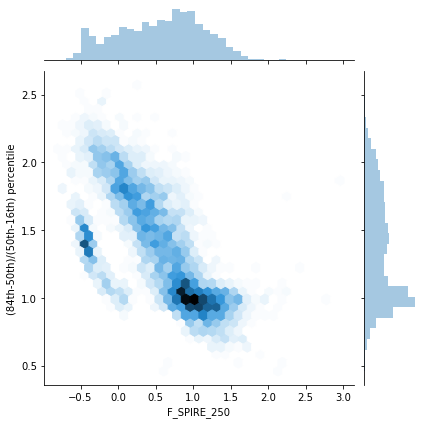

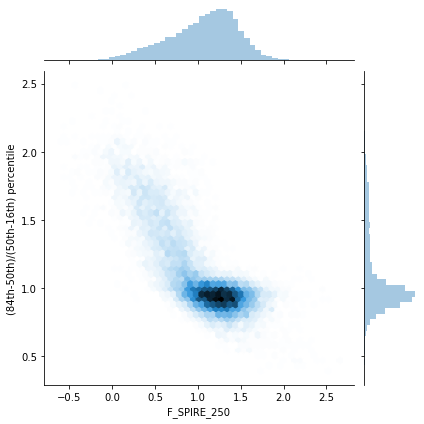

In [96]:
skew=(lofar_spire_table['FErr_SPIRE_250_u']-lofar_spire_table['F_SPIRE_250'])/(lofar_spire_table['F_SPIRE_250']-lofar_spire_table['FErr_SPIRE_250_l'])
skew.name='(84th-50th)/(50th-16th) percentile'
g=sns.jointplot(x=np.log10(lofar_spire_table['F_SPIRE_250']),y=skew, kind='hex')

skew=(lofar_orig['FErr_SPIRE_250_u']-lofar_orig['F_SPIRE_250'])/(lofar_orig['F_SPIRE_250']-lofar_orig['FErr_SPIRE_250_l'])
skew.name='(84th-50th)/(50th-16th) percentile'
g=sns.jointplot(x=np.log10(lofar_orig['F_SPIRE_250']),y=skew, kind='hex')


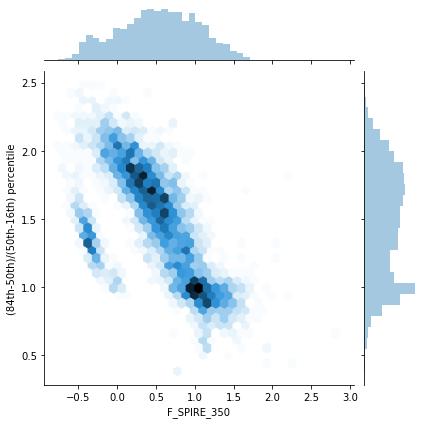

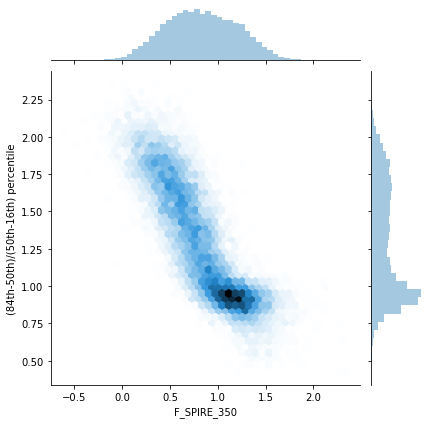

In [97]:
skew=(lofar_spire_table['FErr_SPIRE_350_u']-lofar_spire_table['F_SPIRE_350'])/(lofar_spire_table['F_SPIRE_350']-lofar_spire_table['FErr_SPIRE_350_l'])
skew.name='(84th-50th)/(50th-16th) percentile'
g=sns.jointplot(x=np.log10(lofar_spire_table['F_SPIRE_350']),y=skew, kind='hex')

skew=(lofar_orig['FErr_SPIRE_350_u']-lofar_orig['F_SPIRE_350'])/(lofar_orig['F_SPIRE_350']-lofar_orig['FErr_SPIRE_350_l'])
skew.name='(84th-50th)/(50th-16th) percentile'
g=sns.jointplot(x=np.log10(lofar_orig['F_SPIRE_350']),y=skew, kind='hex')

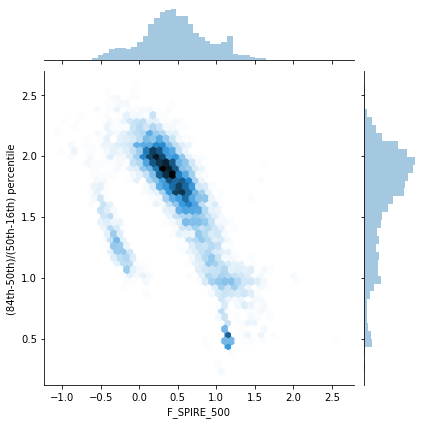

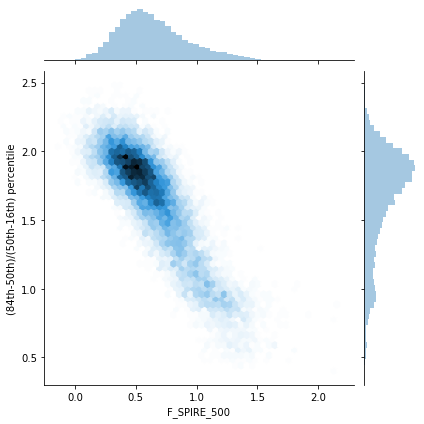

In [98]:
skew=(lofar_spire_table['FErr_SPIRE_500_u']-lofar_spire_table['F_SPIRE_500'])/(lofar_spire_table['F_SPIRE_500']-lofar_spire_table['FErr_SPIRE_500_l'])
skew.name='(84th-50th)/(50th-16th) percentile'
g=sns.jointplot(x=np.log10(lofar_spire_table['F_SPIRE_500']),y=skew, kind='hex')

skew=(lofar_orig['FErr_SPIRE_500_u']-lofar_orig['F_SPIRE_500'])/(lofar_orig['F_SPIRE_500']-lofar_orig['FErr_SPIRE_500_l'])
skew.name='(84th-50th)/(50th-16th) percentile'
g=sns.jointplot(x=np.log10(lofar_orig['F_SPIRE_500']),y=skew, kind='hex')

In [99]:
lofar_spire_table.add_column(Column(np.zeros(len(lofar_spire_table), dtype=bool),name='flag_spire_250'))
lofar_spire_table.add_column(Column(np.zeros(len(lofar_spire_table), dtype=bool),name='flag_spire_350'))
lofar_spire_table.add_column(Column(np.zeros(len(lofar_spire_table), dtype=bool),name='flag_spire_500'))

In [112]:
ind_SERVS_250=(lofar_spire_table['Pval_res_250']>0.5) | (lofar_spire_table['F_SPIRE_250'] < 4)
ind_SERVS_350=(lofar_spire_table['Pval_res_350']>0.5) | (lofar_spire_table['F_SPIRE_350'] < 4)
ind_SERVS_500=(lofar_spire_table['Pval_res_500']>0.5) | (lofar_spire_table['F_SPIRE_500'] < 4)

print(ind_SERVS_250.sum(),ind_SERVS_350.sum(),ind_SERVS_500.sum(),len(lofar_spire_table))

lofar_spire_table['flag_spire_250'][ind_SERVS_250]=True
lofar_spire_table['flag_spire_350'][ind_SERVS_350]=True
lofar_spire_table['flag_spire_500'][ind_SERVS_500]=True

2038 2509 3346 4001


In [101]:
np.sum(lofar_orig['Pval_res_250']>0.5)

461

In [102]:
rerun_col = Column(np.ones(len(lofar_spire_table)),name='XID+_rerun_SPIRE',dtype='bool')
lofar_spire_table.add_column(rerun_col)

In [103]:
lofar_spire_table.rename_column('HELP_ID','help_id')

In [104]:
lofar_spire_table[0]

help_id,RA,Dec,F_SPIRE_250,FErr_SPIRE_250_u,FErr_SPIRE_250_l,F_SPIRE_350,FErr_SPIRE_350_u,FErr_SPIRE_350_l,F_SPIRE_500,FErr_SPIRE_500_u,FErr_SPIRE_500_l,Bkg_SPIRE_250,Bkg_SPIRE_350,Bkg_SPIRE_500,Sig_conf_SPIRE_250,Sig_conf_SPIRE_350,Sig_conf_SPIRE_500,Rhat_SPIRE_250,Rhat_SPIRE_350,Rhat_SPIRE_500,n_eff_SPIRE_250,n_eff_SPIRE_500,n_eff_SPIRE_350,Pval_res_250,Pval_res_350,Pval_res_500,flag_spire_250,flag_spire_350,flag_spire_500,XID+_rerun_SPIRE
,degrees,degrees,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy/Beam,mJy/Beam,mJy/Beam,mJy/Beam,mJy/Beam,mJy/Beam,,,,,,,,,,,,,
bytes27,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,bool,bool,bool,bool
ILTJ142922.65+330757.5,217.344398,33.132768,2.2884002,5.1263633,0.5876314,3.1125546,6.974513,0.86671054,2.2315803,5.200044,0.55100584,-4.731717,-7.5404167,-15.062516,2.8346136,3.74478,5.9275064,0.99907297,0.99970216,0.9993674,2661.8884,3521.5505,3125.2954,0.0,0.0,0.074,True,True,True,True


4001


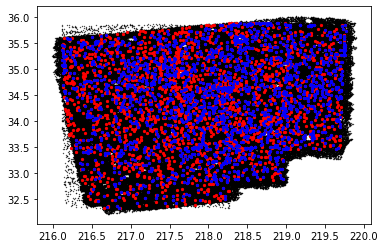

In [108]:
#remove spire sources from the table which are not covered by PACS as these sources are still assigned a PACS flux 
#by XID+ which is wrong

ras = lofar_spire_table['RA']
decs = lofar_spire_table['Dec']

pacs_moc = pymoc.moc.MOC()
read_moc_fits(pacs_moc,'/lustre/scratch/astro/im281/HELP/dmu_products/dmu26/dmu26_XID+SPIRE_Bootes/data/testMoc.fits')

mask = inMoc(ras,decs,pacs_moc)
print(np.sum(mask))

x = pacs_prior['ra']
y = pacs_prior['dec']
plt.scatter(x,y,c='black',s=0.1)

ras = lofar_spire_table['RA'][mask]
decs = lofar_spire_table['Dec'][mask]
plt.scatter(ras,decs,c='red',s=5)

ras = lofar_spire_table['RA'][~ind_SERVS_250 & mask]
decs = lofar_spire_table['Dec'][~ind_SERVS_250 & mask]
plt.scatter(ras,decs,c='blue',s=5)
plt.show()



In [110]:
#remove spire sources from the table which are not covered by spire as these sources are still assigned a spire flux 
#by XID+ which is wrong

ras = lofar_spire_table['RA']
decs = lofar_spire_table['Dec']

spire_moc = pymoc.moc.MOC()
read_moc_fits(spire_moc,'/lustre/scratch/astro/im281/HELP/dmu_products/dmu26/dmu26_XID+SPIRE_Bootes/data/testMoc.fits')

mask = inMoc(ras,decs,spire_moc)
lofar_spire_table = lofar_spire_table[mask]

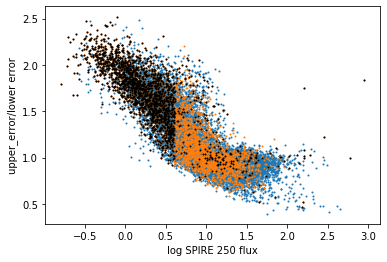

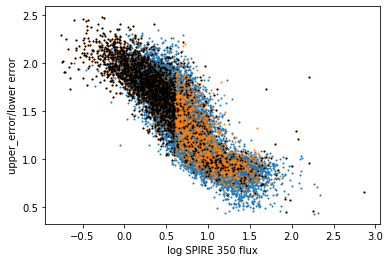

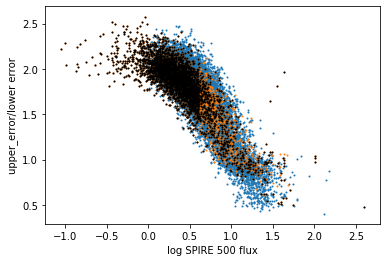

In [113]:
x = np.log10(lofar_orig['F_SPIRE_250'])
y = (lofar_orig['FErr_SPIRE_250_u']-lofar_orig['F_SPIRE_250'])/(lofar_orig['F_SPIRE_250']-lofar_orig['FErr_SPIRE_250_l'])
plt.scatter(x,y,s=1)

x = np.log10(lofar_spire_table['F_SPIRE_250'])
y = (lofar_spire_table['FErr_SPIRE_250_u']-lofar_spire_table['F_SPIRE_250'])/(lofar_spire_table['F_SPIRE_250']-lofar_spire_table['FErr_SPIRE_250_l'])
plt.scatter(x,y,s=1)

plt.scatter(x[ind_SERVS_250],y[ind_SERVS_250],s=1,c='black')
plt.xlabel('log SPIRE 250 flux')
plt.ylabel('upper_error/lower error')
plt.show()

x = np.log10(lofar_orig['F_SPIRE_350'])
y = (lofar_orig['FErr_SPIRE_350_u']-lofar_orig['F_SPIRE_350'])/(lofar_orig['F_SPIRE_350']-lofar_orig['FErr_SPIRE_350_l'])
plt.scatter(x,y,s=1)

x = np.log10(lofar_spire_table['F_SPIRE_350'])
y = (lofar_spire_table['FErr_SPIRE_350_u']-lofar_spire_table['F_SPIRE_350'])/(lofar_spire_table['F_SPIRE_350']-lofar_spire_table['FErr_SPIRE_350_l'])
plt.scatter(x,y,s=1)

plt.scatter(x[ind_SERVS_350],y[ind_SERVS_350],s=1,c='black')
plt.xlabel('log SPIRE 350 flux')
plt.ylabel('upper_error/lower error')
plt.show()

x = np.log10(lofar_orig['F_SPIRE_500'])
y = (lofar_orig['FErr_SPIRE_500_u']-lofar_orig['F_SPIRE_500'])/(lofar_orig['F_SPIRE_500']-lofar_orig['FErr_SPIRE_500_l'])
plt.scatter(x,y,s=1)

x = np.log10(lofar_spire_table['F_SPIRE_500'])
y = (lofar_spire_table['FErr_SPIRE_500_u']-lofar_spire_table['F_SPIRE_500'])/(lofar_spire_table['F_SPIRE_500']-lofar_spire_table['FErr_SPIRE_500_l'])
plt.scatter(x,y,s=1)

plt.scatter(x[ind_SERVS_500],y[ind_SERVS_500],s=1,c='black')
plt.xlabel('log SPIRE 500 flux')
plt.ylabel('upper_error/lower error')
plt.show()

## Plot SPIRE Sources

In [74]:
imfolder='../../../../../HELP/dmu_products/dmu19/dmu19_HELP-SPIRE-maps/data/'

pswfits=imfolder+'Bootes_SPIRE250_v1.0.fits'#SPIRE 250 map
hdulist = fits.open(pswfits)
im250phdu=hdulist[0].header
im250hdu=hdulist['image'].header

im250=hdulist['image'].data*1.0E3 #convert to mJy
w_250 = wcs.WCS(hdulist['image'].header)
hdulist.close()

imfolder='../../../../../HELP/dmu_products/dmu19/dmu19_HELP-SPIRE-maps/data/'
pmwfits=imfolder+'Bootes_SPIRE350_v1.0.fits'#SPIRE 350 map
hdulist = fits.open(pswfits)
im350phdu=hdulist[0].header
im350hdu=hdulist['image'].header

im350=hdulist['image'].data*1.0E3 #convert to mJy
w_350 = wcs.WCS(hdulist['image'].header)
hdulist.close()

imfolder='../../../../../HELP/dmu_products/dmu19/dmu19_HELP-SPIRE-maps/data/'
plwfits=imfolder+'Bootes_SPIRE500_v1.0.fits'#SPIRE 500 map
hdulist = fits.open(pswfits)
im500phdu=hdulist[0].header
im500hdu=hdulist['image'].header

im500=hdulist['image'].data*1.0E3 #convert to mJy
w_500 = wcs.WCS(hdulist['image'].header)
hdulist.close()

In [228]:
#remove pacs sources from the table which are not covered by PACS as these sources are still assigned a PACS flux 
#by XID+ which is wrong

ras = lofar_spire_table['RA']
decs = lofar_spire_table['Dec']
pix_x,pix_y = w_250.wcs_world2pix(ras,decs,0,ra_dec_order=True)
pix_x = pix_x.astype(int)
pix_y = pix_y.astype(int)
fluxes = im250[pix_x,pix_y]
mask = ~np.isnan(fluxes)
print('number of sources not in the spire coverage is {}'.format(np.sum(~mask)))

lofar_spire_table = lofar_spire_table[mask]

number of sources not in the spire coverage is 368


In [75]:
plot_params = {'marker':['o','+','s','v','X','d'],
              'col':['green','cyan','orange'],
              'size':100,
              'box_length':1/60,
              'use_redshift':[False,False,False]}

contours are at [-1.34971057e-04 -6.06384350e-05  1.36941868e-05  8.80268086e-05
  1.62359430e-04  2.36692052e-04  3.11024674e-04]
plotting 1 sources
plotting 1 sources
plotting 1 sources


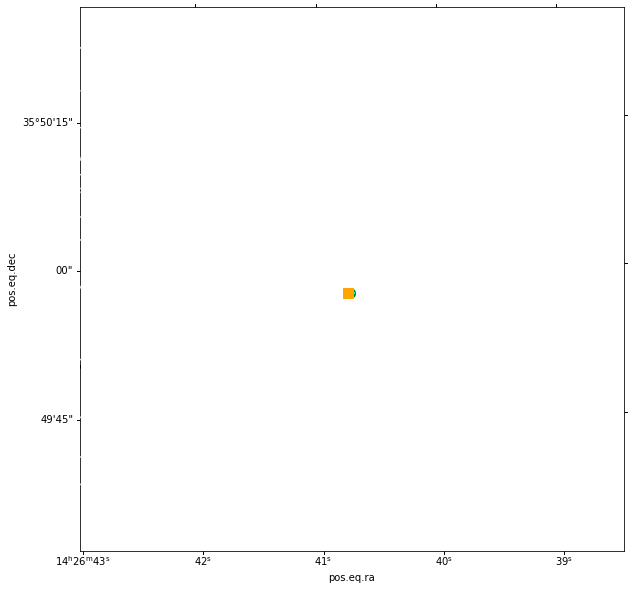

contours are at [-1.34971057e-04 -6.06384350e-05  1.36941868e-05  8.80268086e-05
  1.62359430e-04  2.36692052e-04  3.11024674e-04]
plotting 1 sources
plotting 1 sources
plotting 1 sources


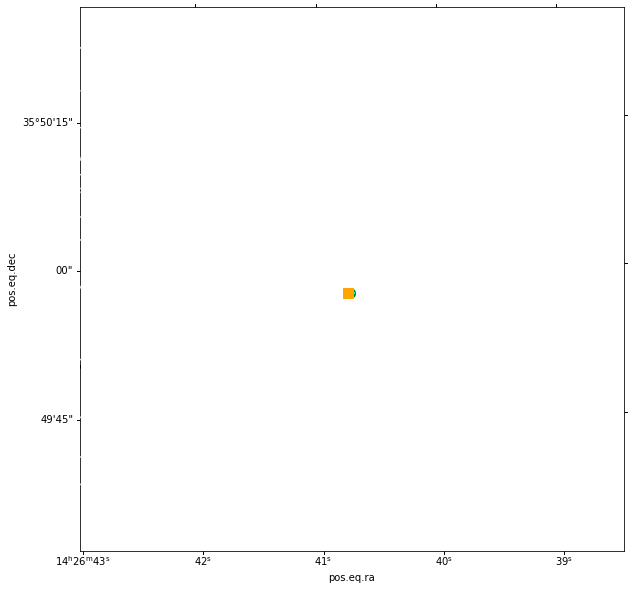

contours are at [-1.34971057e-04 -6.06384350e-05  1.36941868e-05  8.80268086e-05
  1.62359430e-04  2.36692052e-04  3.11024674e-04]
plotting 1 sources
plotting 1 sources
plotting 1 sources


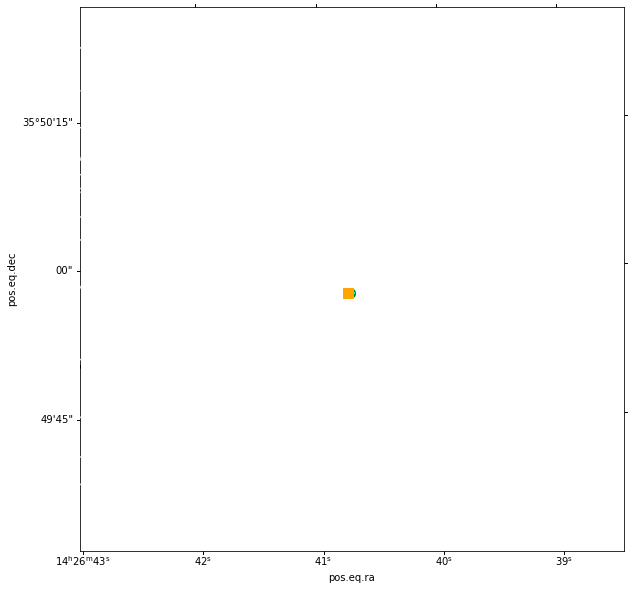

In [80]:
y = (lofar_spire_table['FErr_SPIRE_250_u']-lofar_spire_table['F_SPIRE_250'])/(lofar_spire_table['F_SPIRE_250']-lofar_spire_table['FErr_SPIRE_250_l'])
mask = (np.log10(lofar_spire_table['F_SPIRE_250'])<0) & (y<1.1)

ra = lofar_spire_table['RA'][mask][1]
dec = lofar_spire_table['Dec'][mask][1]
image_plotting.plot_figure(im250,[pacs_prior,lofar_spire_table,lofar_orig],w_250,ra,dec,plot_params,contour_data=[radim_data,radim_wcs])
image_plotting.plot_figure(im350,[pacs_prior,lofar_spire_table,lofar_orig],w_350,ra,dec,plot_params,contour_data=[radim_data,radim_wcs])
image_plotting.plot_figure(im500,[pacs_prior,lofar_spire_table,lofar_orig],w_500,ra,dec,plot_params,contour_data=[radim_data,radim_wcs])

## Merge the MIPS, PACS and SPIRE catalogues

In [126]:
MIPS_x_PACS = join(lofar_mips_table,lofar_pacs_table,keys='help_id',join_type='outer')
fir_table = join(MIPS_x_PACS,lofar_spire_table,keys='help_id',join_type='outer')

In [127]:
'''for name in fir_table.colnames:
    
    if ('RA' in name) or ('Dec' in name):
        print(name)
        fir_table.remove_column(name)'''
fir_table.remove_columns(['RA','RA_2','Dec','Dec_2'])        
fir_table.rename_column('help_id','Source_Name')
fir_table.rename_column('RA_1','RA')
fir_table.rename_column('Dec_1','Dec')

In [128]:
fir_table_v01 = fir_table.copy()

In [129]:
all_fir_table = join(fir_table,fir_table_v01,join_type='outer',keys='Source_Name')

In [130]:
mask = [ids in lofar_orig['Source_Name'] for ids in all_fir_table['Source_Name']]
new_fir_table = all_fir_table[mask]

In [131]:
for name in fir_table.colnames:
    print(name)
    if ('Source' in name) or ('RA' in name) or ('Dec' in name):
        continue
    if ('250' in name) or ('350' in name) or ('500' in name) or ('SPIRE' in name):
        colname = name+'_1'
        new_fir_table.rename_column(colname,name)
        new_fir_table.remove_column(name+'_2')
        continue
    colname = name+'_1'
    print(colname)
    mask = new_fir_table[colname].mask
    new_fir_table[colname][mask] = new_fir_table[name+'_2'][mask]
    new_fir_table.rename_column(colname,name)
    new_fir_table.remove_column(name+'_2')

Source_Name
RA
Dec
F_MIPS_24
F_MIPS_24_1
FErr_MIPS_24_u
FErr_MIPS_24_u_1
FErr_MIPS_24_l
FErr_MIPS_24_l_1
Bkg_MIPS_24
Bkg_MIPS_24_1
Sig_conf_MIPS_24
Sig_conf_MIPS_24_1
Rhat_MIPS_24
Rhat_MIPS_24_1
n_eff_MIPS_24
n_eff_MIPS_24_1
Pval_res_24
Pval_res_24_1
flag_mips_24
flag_mips_24_1
XID+_rerun_mips
XID+_rerun_mips_1
F_PACS_100
F_PACS_100_1
FErr_PACS_100_u
FErr_PACS_100_u_1
FErr_PACS_100_l
FErr_PACS_100_l_1
F_PACS_160
F_PACS_160_1
FErr_PACS_160_u
FErr_PACS_160_u_1
FErr_PACS_160_l
FErr_PACS_160_l_1
Bkg_PACS_100
Bkg_PACS_100_1
Bkg_PACS_160
Bkg_PACS_160_1
Sig_conf_PACS_100
Sig_conf_PACS_100_1
Sig_conf_PACS_160
Sig_conf_PACS_160_1
Rhat_PACS_100
Rhat_PACS_100_1
Rhat_PACS_160
Rhat_PACS_160_1
n_eff_PACS_100
n_eff_PACS_100_1
n_eff_PACS_160
n_eff_PACS_160_1
Pval_res_100
Pval_res_100_1
Pval_res_160
Pval_res_160_1
flag_pacs_100
flag_pacs_100_1
flag_pacs_160
flag_pacs_160_1
XID+_rerun_pacs
XID+_rerun_pacs_1
F_SPIRE_250
FErr_SPIRE_250_u
FErr_SPIRE_250_l
F_SPIRE_350
FErr_SPIRE_350_u
FErr_SPIRE_350_l
F_SPI

In [132]:
#Table.write(fir_table,'data/data_release/XID+_lofar_ELAIS-N1_v0.5_20200113.fits')
from astropy.io import registry
from astropy.table.info import serialize_method_as

with serialize_method_as(new_fir_table, None):
            registry.write(new_fir_table, 'data/data_release/XID+_lofar_Bootes_v0.5_20200209.fits',format='fits')

<class 'astropy.table.table.Table'>
fits


In [74]:
for name in fir_table.colnames:
    
    if ('RA' in name) or ('Dec' in name):
        print(name)
        fir_table.remove_column(name)
fir_table.rename_column('help_id','Source_Name')

RA_1
Dec_1
RA_2
Dec_2
RA
Dec


In [75]:
fir_table[0]

Source_Name,F_MIPS_24,FErr_MIPS_24_u,FErr_MIPS_24_l,Bkg_MIPS_24,Sig_conf_MIPS_24,Rhat_MIPS_24,n_eff_MIPS_24,Pval_res_24,flag_MIPS_24,XID+_rerun_mips,F_PACS_100,FErr_PACS_100_u,FErr_PACS_100_l,F_PACS_160,FErr_PACS_160_u,FErr_PACS_160_l,Bkg_PACS_100,Bkg_PACS_160,Sig_conf_PACS_100,Sig_conf_PACS_160,Rhat_PACS_100,Rhat_PACS_160,n_eff_PACS_100,n_eff_PACS_160,Pval_res_100,Pval_res_160,flag_PACS_100,flag_PACS_160,XID+_rerun_pacs,F_SPIRE_250,FErr_SPIRE_250_u,FErr_SPIRE_250_l,F_SPIRE_350,FErr_SPIRE_350_u,FErr_SPIRE_350_l,F_SPIRE_500,FErr_SPIRE_500_u,FErr_SPIRE_500_l,Bkg_SPIRE_250,Bkg_SPIRE_350,Bkg_SPIRE_500,Sig_conf_SPIRE_250,Sig_conf_SPIRE_350,Sig_conf_SPIRE_500,Rhat_SPIRE_250,Rhat_SPIRE_350,Rhat_SPIRE_500,n_eff_SPIRE_250,n_eff_SPIRE_500,n_eff_SPIRE_350,Pval_res_250,Pval_res_350,Pval_res_500,flag_SPIRE_250,flag_SPIRE_350,flag_SPIRE_500,XID+_rerun_SPIRE
,muJy,muJy,muJy,MJy / sr,MJy / sr,,,,,,mJy,mJy,mJy,mJy,mJy,mJy,mJy/Beam,mJy/Beam,mJy/Beam,mJy/Beam,,,,,,,,,,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy/Beam,mJy/Beam,mJy/Beam,mJy/Beam,mJy/Beam,mJy/Beam,,,,,,,,,,,,,
bytes27,float32,float32,float32,float32,float32,float32,float32,float32,bool,bool,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,bool,bool,bool,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,bool,bool,bool,bool
ILTJ102955.65+580259.6,7.5941215,12.568286,2.53527,0.0015704,4.862012e-06,0.9987956,3321.831,0.0,True,True,19.978607,26.750326,13.41858,21.442863,25.685009,14.63285,6.209543,3.1540887,7.392655,2.9802322,0.9988557,0.99885386,3113.115,2428.529,0.994,0.087,True,False,True,7.007651,9.644292,4.2049346,3.740409,6.3435483,1.6302118,0.44857028,1.1472315,0.124486774,0.57328004,0.45005608,0.6555992,0.5713516,0.8201086,0.6803712,1.000855,1.0006844,0.9989946,1857.553,2799.566,1655.5464,0.285,0.955,0.048,False,True,True,True


In [76]:
fir_table_v01 = fir_table.copy()

In [77]:
all_fir_table = join(fir_table,fir_table_v01,join_type='outer',keys='Source_Name')

In [78]:
mask = [ids in lofar_orig['Source_Name'] for ids in all_fir_table['Source_Name']]
new_fir_table = all_fir_table[mask]

In [79]:
for name in fir_table.colnames:
    if ('Source' in name) or ('RA' in name) or ('Dec' in name):
        continue

    colname = name+'_1'
    mask = new_fir_table[colname].mask
    new_fir_table[colname][mask] = new_fir_table[name+'_2'][mask]
    new_fir_table.rename_column(colname,name)
    new_fir_table.remove_column(name+'_2')

In [80]:
new_fir_table.colnames

['Source_Name',
 'F_MIPS_24',
 'FErr_MIPS_24_u',
 'FErr_MIPS_24_l',
 'Bkg_MIPS_24',
 'Sig_conf_MIPS_24',
 'Rhat_MIPS_24',
 'n_eff_MIPS_24',
 'Pval_res_24',
 'flag_MIPS_24',
 'XID+_rerun_mips',
 'F_PACS_100',
 'FErr_PACS_100_u',
 'FErr_PACS_100_l',
 'F_PACS_160',
 'FErr_PACS_160_u',
 'FErr_PACS_160_l',
 'Bkg_PACS_100',
 'Bkg_PACS_160',
 'Sig_conf_PACS_100',
 'Sig_conf_PACS_160',
 'Rhat_PACS_100',
 'Rhat_PACS_160',
 'n_eff_PACS_100',
 'n_eff_PACS_160',
 'Pval_res_100',
 'Pval_res_160',
 'flag_PACS_100',
 'flag_PACS_160',
 'XID+_rerun_pacs',
 'F_SPIRE_250',
 'FErr_SPIRE_250_u',
 'FErr_SPIRE_250_l',
 'F_SPIRE_350',
 'FErr_SPIRE_350_u',
 'FErr_SPIRE_350_l',
 'F_SPIRE_500',
 'FErr_SPIRE_500_u',
 'FErr_SPIRE_500_l',
 'Bkg_SPIRE_250',
 'Bkg_SPIRE_350',
 'Bkg_SPIRE_500',
 'Sig_conf_SPIRE_250',
 'Sig_conf_SPIRE_350',
 'Sig_conf_SPIRE_500',
 'Rhat_SPIRE_250',
 'Rhat_SPIRE_350',
 'Rhat_SPIRE_500',
 'n_eff_SPIRE_250',
 'n_eff_SPIRE_500',
 'n_eff_SPIRE_350',
 'Pval_res_250',
 'Pval_res_350',
 'Pval_

In [81]:
lofar_fir = join(lofar_orig,new_fir_table,keys='Source_Name',join_type='outer')

In [82]:
lofar_fir[0]

Source_Name,RA,DEC,E_RA,E_DEC,Total_flux,E_Total_flux,Peak_flux,E_Peak_flux,S_Code,Maj,Min,PA,E_Maj,E_Min,E_PA,DC_Maj,DC_Min,DC_PA,Isl_rms,FLAG_WORKFLOW,Prefilter,NoID,lr_fin,optRA,optDec,LGZ_Size,LGZ_Width,LGZ_PA,Assoc,Assoc_Qual,Art_prob,Blend_prob,Hostbroken_prob,Imagemissing_prob,Zoom_prob,Created,Position_from,Renamed_from,FLAG_OVERLAP_RADIO,flag_clean_radio,ID,X_IMAGE,Y_IMAGE,ALPHA_J2000,DELTA_J2000,flag_clean,ID_OPTICAL,ID_SPITZER,FLAG_OVERLAP,EBV,u_flux_corr,u_fluxerr_corr,u_mag_corr,u_magerr_corr,g_flux_corr,g_fluxerr_corr,g_mag_corr,g_magerr_corr,r_flux_corr,r_fluxerr_corr,r_mag_corr,r_magerr_corr,z_flux_corr,z_fluxerr_corr,z_mag_corr,z_magerr_corr,g_rcs_flux_corr,g_rcs_fluxerr_corr,g_rcs_mag_corr,g_rcs_magerr_corr,r_rcs_flux_corr,r_rcs_fluxerr_corr,r_rcs_mag_corr,r_rcs_magerr_corr,i_rcs_flux_corr,i_rcs_fluxerr_corr,i_rcs_mag_corr,i_rcs_magerr_corr,z_rcs_flux_corr,z_rcs_fluxerr_corr,z_rcs_mag_corr,z_rcs_magerr_corr,J_flux_corr,J_fluxerr_corr,J_mag_corr,J_magerr_corr,K_flux_corr,K_fluxerr_corr,K_mag_corr,K_magerr_corr,ch1_swire_flux_corr,ch1_swire_fluxerr_corr,ch1_swire_mag_corr,ch1_swire_magerr_corr,ch2_swire_flux_corr,ch2_swire_fluxerr_corr,ch2_swire_mag_corr,ch2_swire_magerr_corr,ch3_swire_flux_corr,ch3_swire_fluxerr_corr,ch3_swire_mag_corr,ch3_swire_magerr_corr,ch4_swire_flux_corr,ch4_swire_fluxerr_corr,ch4_swire_mag_corr,ch4_swire_magerr_corr,ch1_servs_flux_corr,ch1_servs_fluxerr_corr,ch1_servs_mag_corr,ch1_servs_magerr_corr,ch2_servs_flux_corr,ch2_servs_fluxerr_corr,ch2_servs_mag_corr,ch2_servs_magerr_corr,Separation,help_id,RA_HELP,DEC_HELP,CLASS_STAR,F_MIPS_24_1,FErr_MIPS_24_u_1,FErr_MIPS_24_l_1,Bkg_MIPS_24_1,Sig_conf_MIPS_24_1,Rhat_MIPS_24_1,n_eff_MIPS_24_1,Pval_res_24_1,flag_mips_24,F_PACS_100_1,FErr_PACS_100_u_1,FErr_PACS_100_l_1,F_PACS_160_1,FErr_PACS_160_u_1,FErr_PACS_160_l_1,Bkg_PACS_100_1,Bkg_PACS_160_1,Sig_conf_PACS_100_1,Sig_conf_PACS_160_1,Rhat_PACS_100_1,Rhat_PACS_160_1,n_eff_PACS_100_1,n_eff_PACS_160_1,Pval_res_100_1,Pval_res_160_1,flag_PACS_100_1,flag_PACS_160_1,F_SPIRE_250_1,FErr_SPIRE_250_u_1,FErr_SPIRE_250_l_1,F_SPIRE_350_1,FErr_SPIRE_350_u_1,FErr_SPIRE_350_l_1,F_SPIRE_500_1,FErr_SPIRE_500_u_1,FErr_SPIRE_500_l_1,Bkg_SPIRE_250_1,Bkg_SPIRE_350_1,Bkg_SPIRE_500_1,Sig_conf_SPIRE_250_1,Sig_conf_SPIRE_350_1,Sig_conf_SPIRE_500_1,Rhat_SPIRE_250_1,Rhat_SPIRE_350_1,Rhat_SPIRE_500_1,n_eff_SPIRE_250_1,n_eff_SPIRE_500_1,n_eff_SPIRE_350_1,Pval_res_250_1,Pval_res_350_1,Pval_res_500_1,flag_spire_250,flag_spire_350,flag_spire_500,Z_BEST,Z_BEST_SOURCE,Z_SPEC,z1_median,z1_min,z1_max,z1_area,z2_median,z2_min,z2_max,z2_area,nfilt_eazy,nfilt_atlas,nfilt_ananna,chi_r_best,chi_r_stellar,stellar_type,AGN,optAGN,IRAGN,XrayAGN,hp_idx_11,hp_depth_cluster,tot_corr_g,tot_corr_err_g,tot_corr_r,tot_corr_err_r,tot_corr_z,tot_corr_err_z,zmodel,chi_best,Mass_median,Mass_l68,Mass_u68,SFR_median,SFR_l68,SFR_u68,Nfilts,u_rest,g_rest,r_rest,z_rest,g_rcs_rest,r_rcs_rest,i_rcs_rest,z_rcs_rest,J_rest,K_rest,ch1_servs_rest,ch2_servs_rest,ch1_swire_rest,ch2_swire_rest,ch3_swire_rest,ch4_swire_rest,F_MIPS_24_2,FErr_MIPS_24_u_2,FErr_MIPS_24_l_2,Bkg_MIPS_24_2,Sig_conf_MIPS_24_2,Rhat_MIPS_24_2,n_eff_MIPS_24_2,Pval_res_24_2,flag_MIPS_24,XID+_rerun_mips,F_PACS_100_2,FErr_PACS_100_u_2,FErr_PACS_100_l_2,F_PACS_160_2,FErr_PACS_160_u_2,FErr_PACS_160_l_2,Bkg_PACS_100_2,Bkg_PACS_160_2,Sig_conf_PACS_100_2,Sig_conf_PACS_160_2,Rhat_PACS_100_2,Rhat_PACS_160_2,n_eff_PACS_100_2,n_eff_PACS_160_2,Pval_res_100_2,Pval_res_160_2,flag_PACS_100_2,flag_PACS_160_2,XID+_rerun_pacs,F_SPIRE_250_2,FErr_SPIRE_250_u_2,FErr_SPIRE_250_l_2,F_SPIRE_350_2,FErr_SPIRE_350_u_2,FErr_SPIRE_350_l_2,F_SPIRE_500_2,FErr_SPIRE_500_u_2,FErr_SPIRE_500_l_2,Bkg_SPIRE_250_2,Bkg_SPIRE_350_2,Bkg_SPIRE_500_2,Sig_conf_SPIRE_250_2,Sig_conf_SPIRE_350_2,Sig_conf_SPIRE_500_2,Rhat_SPIRE_250_2,Rhat_SPIRE_350_2,Rhat_SPIRE_500_2,n_eff_SPIRE_250_2,n_eff_SPIRE_500_2,n_eff_SPIRE_350_2,Pval_res_250_2,Pval_res_350_2,Pval_res_500_2,flag_SPIRE_250,flag_SPIRE_350,flag_SPIRE_500,XID+_rerun_SPIRE
,,,,,,,,,,,,,,,

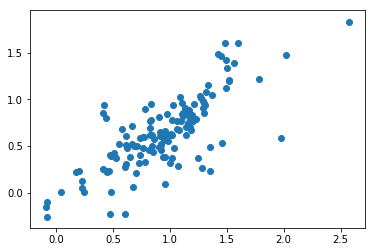

In [98]:
new_mask = ~lofar_fir['F_SPIRE_250_2'].mask
mask = (~np.isnan(lofar_fir['F_SPIRE_250_1'][new_mask])) & (~np.isnan(lofar_fir['F_SPIRE_250_2'][new_mask]))

x = np.log10(lofar_fir['F_SPIRE_250_1'][new_mask][mask])
y = np.log10(lofar_fir['F_SPIRE_250_2'][new_mask][mask])
plt.scatter(x,y)

In [99]:
Table.write(new_fir_table,'data/data_release/XID+_lofar_ELAIS-N1_v0.5.fits')

In [125]:
for name in fir_table.colnames:

    if 'Source' in name:
        continue
    if 'rerun' in name:
        continue
    mask = np.isnan(lofar_fir[name+'_1'])
    lofar_fir[name+'_1'][mask] = lofar_fir[name+'_2'][mask]
    lofar_fir.remove_column(name+'_2')

for name in lofar_fir.colnames:
    if name[-2:]=='_1':
        lofar_fir.rename_column(name,name.replace('_1',''))
    if name[-2:]=='_2':
        lofar_fir.rename_column(name,name.replace('_2',''))

KeyError: 'flag_MIPS_24_1'

In [84]:
test = 'adadadtt'
test[-2:]

'tt'

In [254]:
Table.write(lofar_new_ids,'data/data_release/XID+_lofar_ELAIS-N1.fits',overwrite=True)

### Running checks on the FIR fluxes to see how they compare with the crossmatched fluxes already in the LOFAR catalogue

In [16]:
lofar_cat = Table.read('data/data_release/final_cross_match_catalogue-v0.1.fits')

In [17]:
lofar_cat[0]

Source_Name,RA,DEC,E_RA,E_DEC,Total_flux,E_Total_flux,Peak_flux,E_Peak_flux,S_Code,Maj,Min,PA,E_Maj,E_Min,E_PA,DC_Maj,DC_Min,DC_PA,FLAG_WORKFLOW,Prefilter,lr_fin,optRA,optDec,LGZ_Size,LGZ_Width,LGZ_PA,Assoc,Assoc_Qual,Art_prob,Blend_prob,Hostbroken_prob,Imagemissing_prob,Zoom_prob,Created,Position_from,Renamed_from,FLAG_OVERLAP_RADIO,flag_clean_radio,NUMBER,X_IMAGE,Y_IMAGE,ALPHA_J2000,DELTA_J2000,flag_clean,NUMBER_OPTICAL,NUMBER_SPITZER,FLAG_OVERLAP,Separation,help_id,RA_HELP,DEC_HELP,EBV,Z_SPEC,CLASS_STAR,u_flux,u_fluxerr,g_flux,g_fluxerr,r_flux,r_fluxerr,i_flux,i_fluxerr,z_flux,z_fluxerr,y_flux,y_fluxerr,g_hsc_flux,g_hsc_fluxerr,r_hsc_flux,r_hsc_fluxerr,i_hsc_flux,i_hsc_fluxerr,z_hsc_flux,z_hsc_fluxerr,y_hsc_flux,y_hsc_fluxerr,nb921_hsc_flux,nb921_hsc_fluxerr,J_flux,J_fluxerr,K_flux,K_fluxerr,ch1_servs_flux,ch1_servs_fluxerr,ch2_servs_flux,ch2_servs_fluxerr,ch1_swire_flux,ch1_swire_fluxerr,ch2_swire_flux,ch2_swire_fluxerr,ch3_swire_flux,ch3_swire_fluxerr,ch4_swire_flux,ch4_swire_fluxerr,F_MIPS_24,FErr_MIPS_24_u,FErr_MIPS_24_l,Bkg_MIPS_24,Sig_conf_MIPS_24,Rhat_MIPS_24,n_eff_MIPS_24,Pval_res_24,flag_mips_24,F_PACS_100,FErr_PACS_100_u,FErr_PACS_100_l,F_PACS_160,FErr_PACS_160_u,FErr_PACS_160_l,Bkg_PACS_100,Bkg_PACS_160,Sig_conf_PACS_100,Sig_conf_PACS_160,Rhat_PACS_100,Rhat_PACS_160,n_eff_PACS_100,n_eff_PACS_160,Pval_res_100,Pval_res_160,flag_PACS_100,flag_PACS_160,F_SPIRE_250,FErr_SPIRE_250_u,FErr_SPIRE_250_l,F_SPIRE_350,FErr_SPIRE_350_u,FErr_SPIRE_350_l,F_SPIRE_500,FErr_SPIRE_500_u,FErr_SPIRE_500_l,Bkg_SPIRE_250,Bkg_SPIRE_350,Bkg_SPIRE_500,Sig_conf_SPIRE_250,Sig_conf_SPIRE_350,Sig_conf_SPIRE_500,Rhat_SPIRE_250,Rhat_SPIRE_350,Rhat_SPIRE_500,n_eff_SPIRE_250,n_eff_SPIRE_500,n_eff_SPIRE_350,Pval_res_250,Pval_res_350,Pval_res_500,flag_spire_250,flag_spire_350,flag_spire_500,AGN,optAGN,IRAGN,XrayAGN,z1_median,z1_min,z1_max,z1_area,z2_median,z2_min,z2_max,z2_area,nfilt_eazy,nfilt_atlas,nfilt_ananna,chi_r_best,chi_r_stellar,stellar_type,hp_idx_11,hp_depth_cluster
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,deg,
bytes22,float64,float64,float64,float64,float64,float64,float64,float64,bytes1,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,bytes22,bytes17,bytes22,int64,int64,int64,float32,float32,float64,float64,int64,int64,int32,int64,float64,bytes27,float64,float64,float32,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float64,float64,float64,float64,float64,float64,float32,float32,bool,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,bool,bool,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float32,float32,float32,float32,float32,float32,bool,bool,bool,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,float64,float64,bytes6,int64,int32
ILTJ155957.58+550052.4,239.98990167026162,55.01456045936245,5.366954914924915e-05,8.08706707123675e-05,0.0003958345213565919,5.4160526835678236e-05,0.0003247963953282784,2.715224507873135e-05,S,0.002071920400992901,0.0016345290335764496,166.30848152559156,0.00019279093100176814,0.00012276320016402095,13.835288085283342,0.0,0.0,0.0,1,0,329.1186755105229,239.98983453474398,55.01474018731156,nan,nan,nan,0,nan,nan,nan,nan,nan,nan,Create initial sources,LR,,7,1,1018637,73464.984,38011.69,239.98983453474398,55.01474018731156,1,1180605,--,7

In [22]:
lofar_xid_join = join(lofar_cat,data_rerun_table,join_type='outer',keys='Source_Name')
lofar_xid_join['XID+_rerun'] = ~lofar_xid_join['XID+_rerun'].mask

In [337]:
lofar_xid_join[:5]

Source_Name,RA_1,DEC,E_RA,E_DEC,Total_flux,E_Total_flux,Peak_flux,E_Peak_flux,S_Code,Maj,Min,PA,E_Maj,E_Min,E_PA,DC_Maj,DC_Min,DC_PA,FLAG_WORKFLOW,Prefilter,lr_fin,optRA,optDec,LGZ_Size,LGZ_Width,LGZ_PA,Assoc,Assoc_Qual,Art_prob,Blend_prob,Hostbroken_prob,Imagemissing_prob,Zoom_prob,Created,Position_from,Renamed_from,FLAG_OVERLAP_RADIO,flag_clean_radio,NUMBER,X_IMAGE,Y_IMAGE,ALPHA_J2000,DELTA_J2000,flag_clean,NUMBER_OPTICAL,NUMBER_SPITZER,FLAG_OVERLAP,Separation,help_id,RA_HELP,DEC_HELP,EBV,Z_SPEC,CLASS_STAR,u_flux,u_fluxerr,g_flux,g_fluxerr,r_flux,r_fluxerr,i_flux,i_fluxerr,z_flux,z_fluxerr,y_flux,y_fluxerr,g_hsc_flux,g_hsc_fluxerr,r_hsc_flux,r_hsc_fluxerr,i_hsc_flux,i_hsc_fluxerr,z_hsc_flux,z_hsc_fluxerr,y_hsc_flux,y_hsc_fluxerr,nb921_hsc_flux,nb921_hsc_fluxerr,J_flux,J_fluxerr,K_flux,K_fluxerr,ch1_servs_flux,ch1_servs_fluxerr,ch2_servs_flux,ch2_servs_fluxerr,ch1_swire_flux,ch1_swire_fluxerr,ch2_swire_flux,ch2_swire_fluxerr,ch3_swire_flux,ch3_swire_fluxerr,ch4_swire_flux,ch4_swire_fluxerr,F_MIPS_24,FErr_MIPS_24_u,FErr_MIPS_24_l,Bkg_MIPS_24,Sig_conf_MIPS_24,Rhat_MIPS_24,n_eff_MIPS_24,Pval_res_24,flag_mips_24,F_PACS_100,FErr_PACS_100_u,FErr_PACS_100_l,F_PACS_160,FErr_PACS_160_u,FErr_PACS_160_l,Bkg_PACS_100,Bkg_PACS_160,Sig_conf_PACS_100,Sig_conf_PACS_160,Rhat_PACS_100,Rhat_PACS_160,n_eff_PACS_100,n_eff_PACS_160,Pval_res_100,Pval_res_160,flag_PACS_100,flag_PACS_160,F_SPIRE_250_1,FErr_SPIRE_250_u_1,FErr_SPIRE_250_l_1,F_SPIRE_350_1,FErr_SPIRE_350_u_1,FErr_SPIRE_350_l_1,F_SPIRE_500_1,FErr_SPIRE_500_u_1,FErr_SPIRE_500_l_1,Bkg_SPIRE_250_1,Bkg_SPIRE_350_1,Bkg_SPIRE_500_1,Sig_conf_SPIRE_250_1,Sig_conf_SPIRE_350_1,Sig_conf_SPIRE_500_1,Rhat_SPIRE_250_1,Rhat_SPIRE_350_1,Rhat_SPIRE_500_1,n_eff_SPIRE_250_1,n_eff_SPIRE_500_1,n_eff_SPIRE_350_1,Pval_res_250_1,Pval_res_350_1,Pval_res_500_1,flag_spire_250,flag_spire_350,flag_spire_500,AGN,optAGN,IRAGN,XrayAGN,z1_median,z1_min,z1_max,z1_area,z2_median,z2_min,z2_max,z2_area,nfilt_eazy,nfilt_atlas,nfilt_ananna,chi_r_best,chi_r_stellar,stellar_type,hp_idx_11,hp_depth_cluster,RA_2,Dec,F_SPIRE_250_2,FErr_SPIRE_250_u_2,FErr_SPIRE_250_l_2,F_SPIRE_350_2,FErr_SPIRE_350_u_2,FErr_SPIRE_350_l_2,F_SPIRE_500_2,FErr_SPIRE_500_u_2,FErr_SPIRE_500_l_2,Bkg_SPIRE_250_2,Bkg_SPIRE_350_2,Bkg_SPIRE_500_2,Sig_conf_SPIRE_250_2,Sig_conf_SPIRE_350_2,Sig_conf_SPIRE_500_2,Rhat_SPIRE_250_2,Rhat_SPIRE_350_2,Rhat_SPIRE_500_2,n_eff_SPIRE_250_2,n_eff_SPIRE_500_2,n_eff_SPIRE_350_2,Pval_res_250_2,Pval_res_350_2,Pval_res_500_2,XID+_rerun
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,deg,,degrees,degrees,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy/Beam,mJy/Beam,mJy/Beam,mJy/Beam,mJy/Beam,mJy/Beam,,,,,,,,,,
bytes27,float64,float64,float64,float64,float64,float64,float64,float64,bytes1,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,bytes22,bytes17,bytes22,int64,int64,int64,float32,float32,float64,float64,int64,int64,int32,int64,float64,bytes27,float64,float64,float32,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float64,float64,float64,float64,float64,float64,float32,float32,bool,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,bool,bool,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float32,float32,float32,float32,float32,float32,bool,bool,bool,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float

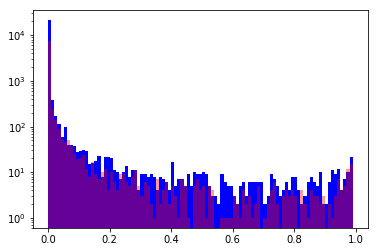

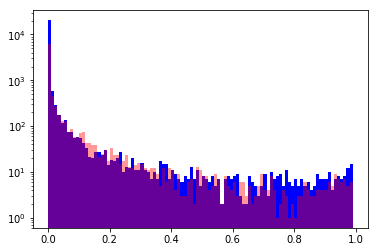

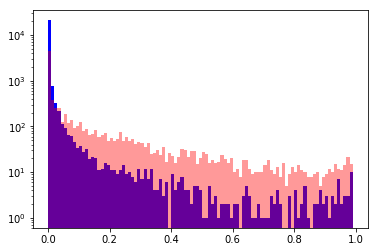

In [73]:
bins = np.arange(0,1,0.01)
dat = lofar_cat['Pval_res_250']
plt.hist(dat,bins=bins,log=True,color='blue')

dat = data_rerun_table['Pval_res_250']
plt.hist(dat,bins=bins,log=True,color='red',alpha=0.4)

plt.show()

dat = lofar_cat['Pval_res_350']
plt.hist(dat,bins=bins,log=True,color='blue')

dat = data_rerun_table['Pval_res_350']
plt.hist(dat,bins=bins,log=True,color='red',alpha=0.4)

plt.show()

dat = lofar_cat['Pval_res_500']
plt.hist(dat,bins=bins,log=True,color='blue')

dat = data_rerun_table['Pval_res_500']
plt.hist(dat,bins=bins,log=True,color='red',alpha=0.4)

plt.show()

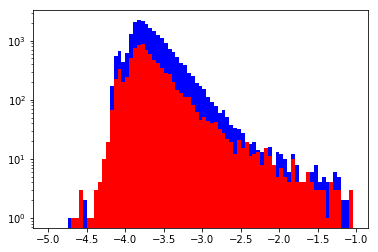

In [88]:
mask = ~np.isnan(lofar_cat['F_SPIRE_250'])
bins = np.arange(-5,-1,0.05)
dat = np.log10(lofar_cat['Peak_flux'][mask])
plt.hist(dat,bins=bins,log=True,color='blue')

dat = np.log10(lofar_cat['Peak_flux'][~mask])
plt.hist(dat,bins=bins,log=True,color='red')
plt.show()

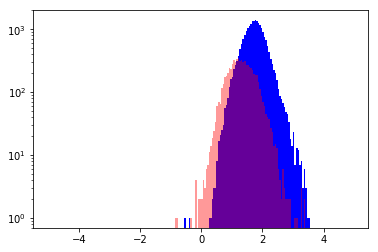

In [92]:
mask = ~np.isnan(lofar_cat['F_SPIRE_250'])
bins = np.arange(-5,5,0.05)
dat = np.log10(lofar_cat['ch1_swire_flux'][mask])
plt.hist(dat,bins=bins,log=True,color='blue')

dat = np.log10(lofar_cat['ch1_swire_flux'][~mask])
plt.hist(dat,bins=bins,log=True,color='red',alpha=0.4)
plt.show()

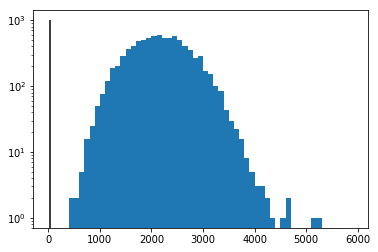

In [98]:
bins = np.arange(0,6000,100)
dat = data_rerun_table['n_eff_SPIRE_250']
plt.hist(dat,bins=bins,log=True)
plt.vlines(40,0,1000)
plt.show()

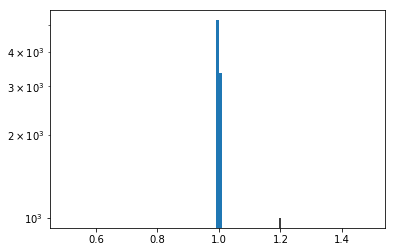

In [101]:
bins = np.arange(0.5,1.5,0.01)
dat = data_rerun_table['Rhat_SPIRE_250']
plt.hist(dat,bins=bins,log=True)
plt.vlines(1.2,0,1000)
plt.show()

In [328]:
len(lofar_xid_join)

31748

23179
8569


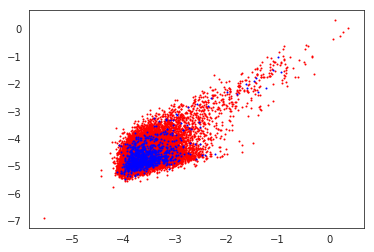

In [342]:
mask = lofar_xid_join['XID+_rerun']
bins = np.arange(0,5,0.1)

#plt.hist(dat,bins=bins,log=True,color='blue')
dist = cosmo.luminosity_distance(dat).to(u.m).value
rad = np.log10(lofar_xid_join['Total_flux'][~mask])
fir = np.log10(lofar_xid_join['F_SPIRE_250_1'][~mask])
y = rad-fir
print(len(y))
plt.scatter(rad,y,s=1,c='red')


#plt.hist(dat,bins=bins,log=True,color='red',alpha=0.4)
rad = np.log10(lofar_xid_join['Total_flux'][mask])
fir = np.log10(lofar_xid_join['F_SPIRE_250_1'][mask])
y = rad-fir
print(len(y))
plt.scatter(rad,y,s=1,c='blue')
plt.show()

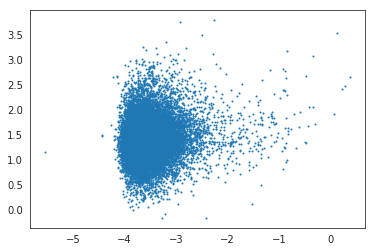

In [349]:
mask = ~lofar_xid_join['XID+_rerun']
x = np.log10(lofar_xid_join['Total_flux'][mask])
y = np.log10(lofar_xid_join['F_MIPS_24'][mask]/lofar_xid_join['F_SPIRE_250_1'][mask])
plt.scatter(x,y,s=1)
plt.show()

26328
6500


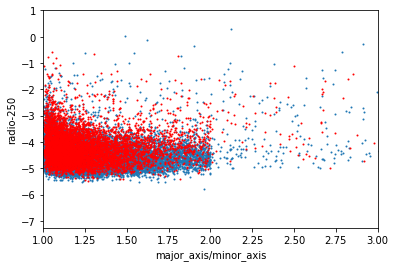

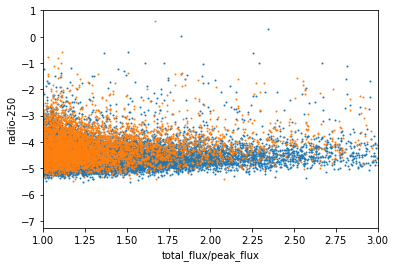

In [74]:
mask = ~lofar_xid_join['XID+_rerun']
x = lofar_xid_join['Maj'][mask]/lofar_xid_join['Min'][mask]
print(len(x))
y = np.log10(lofar_xid_join['Total_flux'][mask]/lofar_xid_join['F_SPIRE_250_1'][mask])
plt.scatter(x,y,s=1)

mask = lofar_xid_join['XID+_rerun']
x = lofar_xid_join['Maj'][mask]/lofar_xid_join['Min'][mask]
print(len(x))
y = np.log10(lofar_xid_join['Total_flux'][mask]/lofar_xid_join['F_SPIRE_250_2'][mask])
plt.scatter(x,y,s=1,c='red')

plt.xlim(1,3)
plt.xlabel('major_axis/minor_axis')
plt.ylabel('radio-250')
plt.show()

mask = ~lofar_xid_join['XID+_rerun']
x = lofar_xid_join['Total_flux'][mask]/lofar_xid_join['Peak_flux'][mask]
y = np.log10(lofar_xid_join['Total_flux'][mask]/lofar_xid_join['F_SPIRE_250_1'][mask])
plt.scatter(x,y,s=1)

mask = lofar_xid_join['XID+_rerun']
x = lofar_xid_join['Total_flux'][mask]/lofar_xid_join['Peak_flux'][mask]
y = np.log10(lofar_xid_join['Total_flux'][mask]/lofar_xid_join['F_SPIRE_250_2'][mask])
plt.scatter(x,y,s=1)

plt.xlim(1,3)
plt.xlabel('total_flux/peak_flux')
plt.ylabel('radio-250')
plt.show()

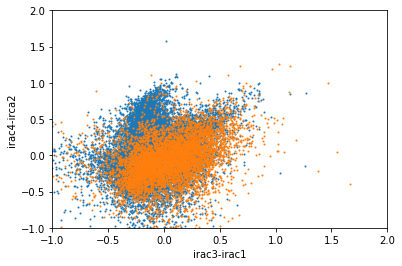

In [75]:
mask = ~np.isnan(lofar_cat['F_SPIRE_250']) #& (lofar_cat['z1_median']>z_bins[n]) & (lofar_cat['z1_median']<z_bins[n+1])
c1 = np.log10(lofar_cat['ch3_swire_flux'][mask]/lofar_cat['ch1_swire_flux'][mask])
c2 = np.log10(lofar_cat['ch4_swire_flux'][mask]/lofar_cat['ch2_swire_flux'][mask])
plt.scatter(c1,c2,s=1)

mask = np.isnan(lofar_cat['F_SPIRE_250']) #& (lofar_cat['z1_median']>z_bins[n]) & (lofar_cat['z1_median']<z_bins[n+1])
c1 = np.log10(lofar_cat['ch3_swire_flux'][mask]/lofar_cat['ch1_swire_flux'][mask])
c2 = np.log10(lofar_cat['ch4_swire_flux'][mask]/lofar_cat['ch2_swire_flux'][mask])
z_col = lofar_cat['z1_median'][mask]
z_bins = np.arange(0,4,0.5)
z_binned = np.digitize(z_col,z_bins)
#plt.scatter(c1[0],c2[0],s=100,c='red')
plt.scatter(c1,c2,s=1)
#plt.scatter(c1[0],c2[0],s=10,c='red')
#plt.scatter(c1[0],c2[0],s=1,c=z_binned[0])


plt.xlim(-1,2)
plt.ylim(-1,2)
plt.xlabel('irac3-irac1')
plt.ylabel('irac4-irca2')
#plt.title('{} < z < {}'.format(z_bins[n],z_bins[n+1]))
plt.show()

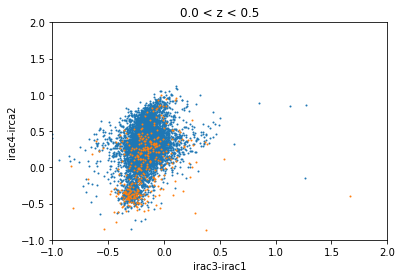

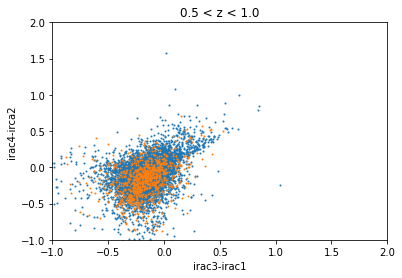

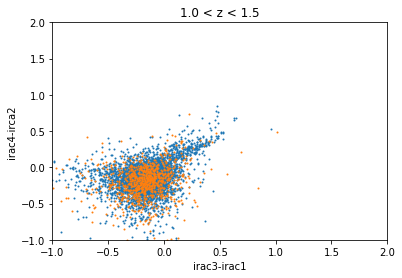

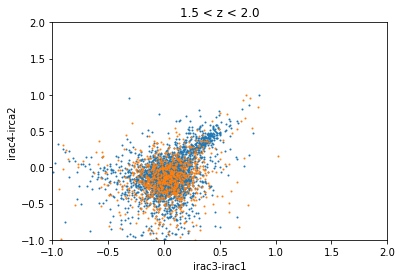

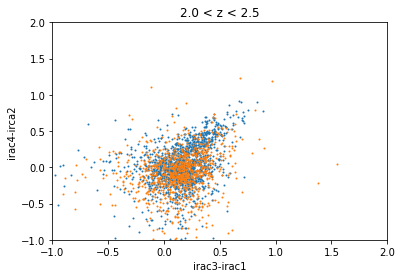

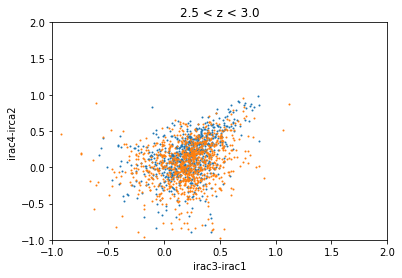

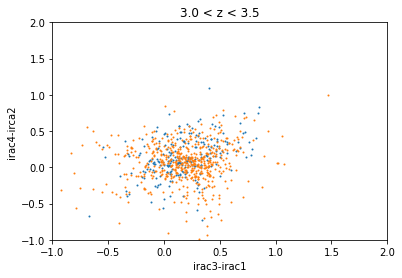

In [76]:
z_bins = np.arange(0,4,0.5)
dist = cosmo.luminosity_distance(lofar_cat['z1_median']).to(u.m).value
ch1_lum = lofar_cat['ch1_swire_flux']*4*np.pi*dist**2
ch2_lum = lofar_cat['ch2_swire_flux']*4*np.pi*dist**2
ch3_lum = lofar_cat['ch3_swire_flux']*4*np.pi*dist**2
ch4_lum = lofar_cat['ch4_swire_flux']*4*np.pi*dist**2
for n in range(len(z_bins)-1):
    mask = ~np.isnan(lofar_cat['F_SPIRE_250']) & (lofar_cat['z1_median']>z_bins[n]) & (lofar_cat['z1_median']<z_bins[n+1])
    c1 = np.log10(lofar_cat['ch3_swire_flux'][mask]/lofar_cat['ch1_swire_flux'][mask])
    c2 = np.log10(lofar_cat['ch4_swire_flux'][mask]/lofar_cat['ch2_swire_flux'][mask])
    plt.scatter(c1,c2,s=1)

    mask = np.isnan(lofar_cat['F_SPIRE_250']) & (lofar_cat['z1_median']>z_bins[n]) & (lofar_cat['z1_median']<z_bins[n+1])
    c1 = np.log10(lofar_cat['ch3_swire_flux'][mask]/lofar_cat['ch1_swire_flux'][mask])
    c2 = np.log10(lofar_cat['ch4_swire_flux'][mask]/lofar_cat['ch2_swire_flux'][mask])
    z_col = lofar_cat['z1_median'][mask]
    z_bins = np.arange(0,4,0.5)
    z_binned = np.digitize(z_col,z_bins)
#plt.scatter(c1[0],c2[0],s=100,c='red')
    plt.scatter(c1,c2,s=1)
#plt.scatter(c1[0],c2[0],s=10,c='red')
#plt.scatter(c1[0],c2[0],s=1,c=z_binned[0])


    plt.xlim(-1,2)
    plt.ylim(-1,2)
    plt.xlabel('irac3-irac1')
    plt.ylabel('irac4-irca2')
    plt.title('{} < z < {}'.format(z_bins[n],z_bins[n+1]))
    plt.show()

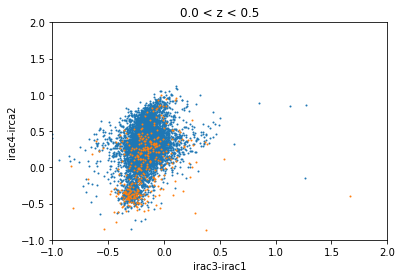

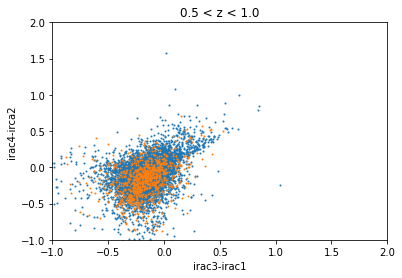

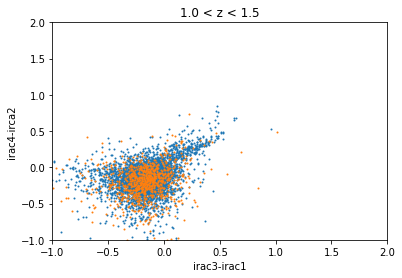

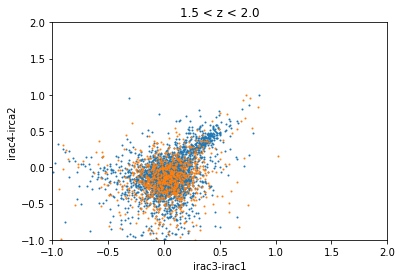

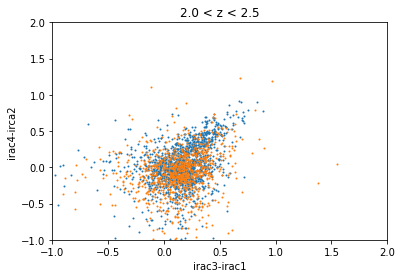

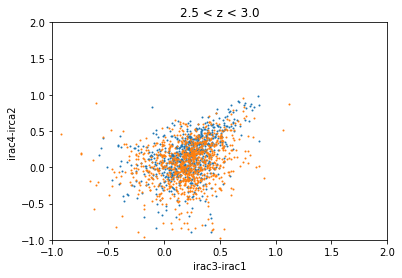

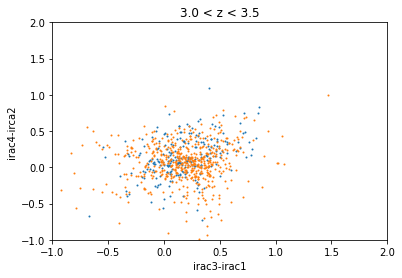

In [31]:
z_bins = np.arange(0,4,0.5)
dist = cosmo.luminosity_distance(lofar_cat['z1_median']).to(u.m).value
ch1_lum = lofar_cat['ch1_swire_flux']*4*np.pi*dist**2
ch2_lum = lofar_cat['ch2_swire_flux']*4*np.pi*dist**2
ch3_lum = lofar_cat['ch3_swire_flux']*4*np.pi*dist**2
ch4_lum = lofar_cat['ch4_swire_flux']*4*np.pi*dist**2
for n in range(len(z_bins)-1):
    mask = ~np.isnan(lofar_cat['F_SPIRE_250']) & (lofar_cat['z1_median']>z_bins[n]) & (lofar_cat['z1_median']<z_bins[n+1])
    c1 = np.log10(ch3_lum[mask]/ch1_lum[mask])
    c2 = np.log10(ch4_lum[mask]/ch2_lum[mask])
    plt.scatter(c1,c2,s=1)

    mask = np.isnan(lofar_cat['F_SPIRE_250']) & (lofar_cat['z1_median']>z_bins[n]) & (lofar_cat['z1_median']<z_bins[n+1])
    c1 = np.log10(ch3_lum[mask]/ch1_lum[mask])
    c2 = np.log10(ch4_lum[mask]/ch2_lum[mask])
    z_col = lofar_cat['z1_median'][mask]
    z_bins = np.arange(0,4,0.5)
    z_binned = np.digitize(z_col,z_bins)
#plt.scatter(c1[0],c2[0],s=100,c='red')
    plt.scatter(c1,c2,s=1)
#plt.scatter(c1[0],c2[0],s=10,c='red')
#plt.scatter(c1[0],c2[0],s=1,c=z_binned[0])


    plt.xlim(-1,2)
    plt.ylim(-1,2)
    plt.xlabel('irac3-irac1')
    plt.ylabel('irac4-irca2')
    plt.title('{} < z < {}'.format(z_bins[n],z_bins[n+1]))
    plt.show()